<a href="https://colab.research.google.com/github/ba-careerpath-7/Data_Driven_E-Commerce_A-B_Testing_Project/blob/main/Data_Driven_E_Commerce_A_B_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✌🏼 Data Driven E-Commerce A/B Testing Project



#⭐ SECTION A: Introduction

Hello guys!

Welcome to the A/B Testing Project!


Many people who are into experiments such as marketing data may have already heard the phrase "A/B Testing". This may sound like a complex topic, but I am here to tell you that is NOT a complex topic!

If you are familiar with statistics, A/B Testing is just a two sample statistical test in disguise, such as a two sample t-test. That's it!

So this project will go over the basics of statistical inference, A/B testing, and even applications on how to implement Natural Language Processing (NLP) and bootstrapping. We will even extend A/B testing to A/B/C/D/E testing using Analysis of Variance (ANOVA).



---





### Motivation for doing statistical tests such as A/B tests!

Lets say that we conduct a A/B test on the weights of NBA centers vs NBA point guards. We find that we have evidence that the weights of centers and point guards are different.

We can use that decision to make basketball strategies where a center who tends to be heavier should prioritize being in the paint, while a point guard should do plays that require fast movement since point guards tend to weigh less.

Statistical tests like t-tests, A/B tests, and ANOVA are a powerful tools for data-driven decision making. This project shows some reasons why they are widely used in data science today.

---

### What questions are we examining?

This project will use customer transaction data. This data contains 10,000 customers with variables such as age, gender, country, annual income, number of purchases, feedback ratings, and churn rates.

* Variables such as age, gender, and country will be our groups that we compare. Notice that these variables are discrete numbers or categorical types.

* Variables such as annual income, number of purchases, and churn rates are continuous numbers that can be decimals. We will measure how groups differ from each other using these continuous variables. (Notice that feedback ratings are words, not numbers. In SECTION F, we will go over how to use NLP to get numerical scores out of those sentences.)


**We will answer 6 questions in this project:**

1. Single Mean Test on annual income for USA customers:

Does this data set show a statistically different average from the USA average annual income?

2. Difference in Means A/B Test on annual income for Males and Females:

Do we have evidence that males and females have different average annual incomes?


3. Difference in Proportions A/B Test on churned customers for USA and other countries:

Do we have evidence that the proportion of USA churned customers is different from the proportion of churned customers from other countries?

(Churned definition: To stop using a product or service.)


4. Difference in Means A/B Test on feedback text for young and elder people (Using NLP):

Can we find evidence that young and elder people have different average emotional scores when leaving feedback for the products they buy?

5. One Way ANOVA Test on the average number of purchases made for each of the 5 countries:

Is there evidence that at LEAST one country has a different average number of purchases when analyzing 5 different countries?

6. Difference in Means A/B Test on annual income for Males and Females (Bootstrap Resampling to revisit Question 2):

Can we give additional evidence of Question 2's result? We will use a process called bootstrapping that mimics real data, even if our sample size is small.

Before answering these questions, lets jump into cleaning and exploring the data!!!

---

In [1]:
# Regular data science starting imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # will remove red warnings in final output

sns.set()

In [2]:
# starting imports for A/B testing:

# ALERT: We need this to do statistical inference!

from scipy import stats





## How to Navigate this Project

This project contains a lot of content, so I decided to put emojis on each major section and on summary tables.


Here is the content table below:

In [3]:
content_table = pd.DataFrame({"Major Sections and Table Results":[
    "SECTION A: Introduction",
    "SECTION B: Data Cleaning, Data Visualization, and Additional Discoveries",
    "SECTION C: Exploratory Data Analysis (EDA)",
    "SECTION D: Hypothesis Tests, Confidence Intervals, Rejection Regions, and p-values",
    "SECTION E: Diving into A/B Testing",
    "SECTION F: Combining Natural Language Processing (NLP) and A/B Testing",
    "SECTION G: ANOVA, A/B/C/D/E... Testing",
    "SECTION H: Statistical Inference on Bootstrapping",
    "SECTION I: A/B testing on Bootstrapped data",
    "SECTION J: Final Conclusion",
    "Key Considerations"],


                              "Associated Emoji":["⭐",
                                                  "📊",
                                                  "🔎",
                                                  "📝",
                                                  "👨‍👦",
                                                  "🌴",
                                                  "🔢",
                                                  "👢",
                                                  "🐫",
                                                  "💡",
                                                  "❗"
                                                  ]})

content_table

,Major Sections and Table Results,Associated Emoji
0,SECTION A: Introduction,⭐
1,"SECTION B: Data Cleaning, Data Visualization, ...",📊
2,SECTION C: Exploratory Data Analysis (EDA),🔎
3,"SECTION D: Hypothesis Tests, Confidence Interv...",📝
4,SECTION E: Diving into A/B Testing,👨‍👦
5,SECTION F: Combining Natural Language Processi...,🌴
6,"SECTION G: ANOVA, A/B/C/D/E... Testing",🔢
7,SECTION H: Statistical Inference on Bootstrapping,👢
8,SECTION I: A/B testing on Bootstrapped data,🐫
9,SECTION J: Final Conclusion,💡


## Uploading the CSV file:

I got my CSV file from this Kaggle Website:
https://www.kaggle.com/datasets/fares279/customers-transactions/data



# Here is the A/B Customer Transaction data set:


In [4]:
#---------------------------------------------------------------------
# code that allows us to import files from computer to google collab
from google.colab import files
import io

# step 1: upload your CSV (colab will show a file picker)
uploaded = files.upload()

# step 2: read the uploaded CSV into a pandas DataFrame

# SELECT: customer_transaction_AB_project from files


AB_df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

AB_df


#---------------------------------------------------------------------




Saving Data_Driven_E_Commerce_AB_Project.csv to Data_Driven_E_Commerce_AB_Project.csv


,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,Very satisfied with my purchase.,2025-06-22
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,Good quality and value for money.,2025-10-17
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,Excellent customer service.,2025-07-01
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,Good quality and value for money.,2025-08-17
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,Excellent customer service.,2025-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,39,Female,France,45002,39,13,45.50,4,28,0.75,0,Excellent customer service.,2025-08-06
9996,9997,44,Male,USA,95367,86,41,54.22,13,17,0.19,0,"Great experience, will shop again!",2025-08-15
9997,9998,25,Female,USA,73884,33,17,49.58,4,1,0.71,0,Love the products and fast shipping.,2025-10-26
9998,9999,19,Female,USA,80849,85,12,49.20,0,18,0.33,0,Excellent customer service.,2025-09-16


## What each variable does:

According to Kacem's Customer Transaction data set from Kaggle,

"
* customer_id — Unique user identifier.

* age — Age of the customer.

* gender — Customer gender (Male/Female).

* country — Country of origin.

* annual_income — Yearly income in USD.

* spending_score — Customer loyalty/spending rating (1–100).

* num_purchases — Total purchases made.

* avg_purchase_value — Average order value.

* membership_years — Years as a member.

* website_visits_per_month — Average site visits per month.

* cart_abandon_rate — Proportion of carts abandoned (0–1).

* churned — Binary label: 1 = churned, 0 = active.

* feedback_text — Customer review or free-text feedback.

* last_purchase_date — Date of last purchase " (Kacem).




# 📊 SECTION B: Data Cleaning, Data  Discoveries

Before jumping into A/B testing, machine learning, or anything data science related, we have some prerequisites to take care of:

1. Data Cleaning

* We need to make sure the data has no NA values. If so, we need to find out why the data has NA values and then replace the NA values.

* We also want the data set to be in a readable format.

2. Data Discoveries

* Is there something interesting we can see based on aggregates, filtering, or summarizing the data?

* For example, maybe we can group by the control group and the exposed group, and see what group had the most "yes".





## 1. Data Cleaning

Lets first check if there are any NA values.


### Checking for NA values:

In [5]:

# 1. do .isna() -> False is no NA, True if NA
# 2. do .sum() -> sum up all 0's and 1's

AB_df.isna().sum()



,0
customer_id,0
age,0
gender,0
country,0
annual_income,0
spending_score,0
num_purchases,0
avg_purchase_value,0
membership_years,0
website_visits_per_month,0


Well there are no NA values. We do not have to worry about replacing NA values or understanding why they existed in the first place.

We need to keep in mind that in real life data sets, they will almost always be messy.

### Checking for duplicates:

Does our data frame have any duplicates?


In [6]:
# first calculate the shape
AB_df.shape


(10000, 14)

In [7]:
# first calculate
AB_df.drop_duplicates().shape




(10000, 14)

Since the size is the same for both the original data frame and the dropped duplicates data frame, we do not have any duplicates either!

### Checking each variable's value:

Do we have any inconsistent values?

Lets just check the discrete or categorical values.


In [8]:
# age:
print("Age values:", np.sort(AB_df["age"].unique()))

print()

# gender:
print("Gender values:", AB_df["gender"].unique())

print()

# country:
print("Country values:", AB_df["country"].unique())


Age values: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70]

Gender values: ['Male' 'Female']

Country values: ['Germany' 'India' 'Australia' 'UK' 'Brazil' 'USA' 'Japan' 'France'
 'South Africa' 'Canada']


I do not see any inconsitent or alarming values from the discrete or categorical variables.



---

## 2. Data Discoveries





Can we find any interesting discoveries in the Advertisement data set?

As a follow up, can we visualize the interesting discoveries?


In [9]:
# recall that the AB df is:

AB_df


,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,Very satisfied with my purchase.,2025-06-22
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,Good quality and value for money.,2025-10-17
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,Excellent customer service.,2025-07-01
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,Good quality and value for money.,2025-08-17
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,Excellent customer service.,2025-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,39,Female,France,45002,39,13,45.50,4,28,0.75,0,Excellent customer service.,2025-08-06
9996,9997,44,Male,USA,95367,86,41,54.22,13,17,0.19,0,"Great experience, will shop again!",2025-08-15
9997,9998,25,Female,USA,73884,33,17,49.58,4,1,0.71,0,Love the products and fast shipping.,2025-10-26
9998,9999,19,Female,USA,80849,85,12,49.20,0,18,0.33,0,Excellent customer service.,2025-09-16


### What are the average income for male and females?

Lets use groupby() in pandas to explore this!

In [10]:
male_female_df = AB_df.groupby(["gender"])["annual_income"].mean()

male_female_df


,annual_income
gender,
Female,86436.426170
Male,85708.102903


In [11]:
print("Difference of female and male income:", round(male_female_df[0] - male_female_df[1], 2))



Difference of female and male income: 728.32


It appears that females have a higher income then men. The difference is about 728.32 dollars.

### What are the average of continous variables for male and females?

Now lets check all continous variables and the averages between male and females.


In [12]:
male_female_df = AB_df.groupby(["gender"]).mean(numeric_only = True)

male_female_df




,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned
gender,,,,,,,,,,
Female,4972.579704,44.130038,86436.426170,50.911687,22.611910,47.495121,6.346972,15.466680,0.502188,0.105732
Male,5027.725459,43.963658,85708.102903,50.936401,22.540984,47.401025,6.334189,15.686747,0.500269,0.112186


We do need to be careful. The average customer_id does not seem to tell us any useful information since customer_id is simply the id of a person regardless of their gender.

Other variable averages between male and female honestly seem similar.

Lets make a pie chart of the the number of males and females.

In [13]:
values = AB_df["gender"].value_counts()

values

,count
gender,
Male,5063
Female,4937


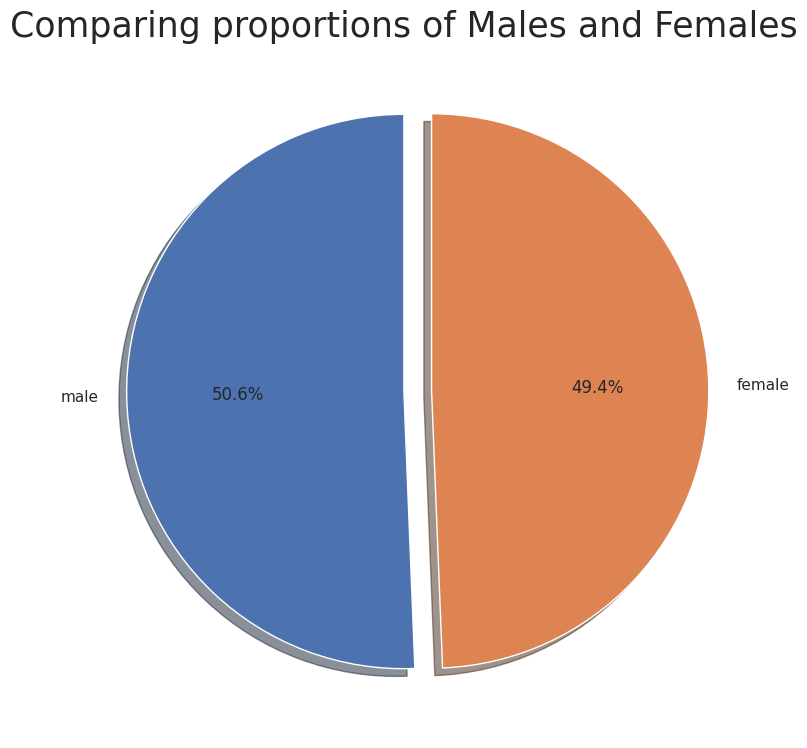

In [14]:
fig = plt.figure(figsize = (15,9))

categories = ["male", "female"]
color_list = ["red","blue"]


plt.pie(values,
        labels = categories, # labels should be our categories
        autopct = "%1.1f%%", # need this format for percent numbers
        explode = [0, 0.1], # split the female part
        shadow = True, # put shadow
        startangle = 90)

plt.title("Comparing proportions of Males and Females", fontsize = 25);


Interesting. It appears the males and females have similar proportions, half and half.

### Average income by Country?

Each country is bound to have different average income since each country has different GDP and economies.

Lets see what the data suggests:

In [15]:
country_df = AB_df.groupby(["country"])["annual_income"].mean()

country_df

,annual_income
country,
Australia,106057.346491
Brazil,55385.631220
Canada,103189.842995
France,55375.910937
Germany,102271.419643
India,53936.986877
Japan,106217.042424
South Africa,54797.360406
UK,102161.529121


It is interesting to see that the average annual income values are in 50k or 100k values.

### Average continuous variables by Country?


In [16]:
country_df = AB_df.groupby(["country"]).mean(numeric_only = True)

country_df

,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned
country,,,,,,,,,,
Australia,4998.134503,43.380117,106057.346491,51.425439,23.745614,51.356798,6.383041,15.453216,0.489678,0.097953
Brazil,5002.160000,44.245854,55385.631220,50.299512,20.874146,41.286820,6.304390,15.617561,0.500078,0.110244
Canada,5068.245169,44.311594,103189.842995,51.380435,23.293478,51.181063,6.265700,15.373188,0.500580,0.096618
France,5029.418750,43.862500,55375.910937,49.473438,20.742188,40.745359,6.282813,16.248438,0.496344,0.120313
Germany,4929.590278,44.747024,102271.419643,50.772817,23.514881,50.899444,6.416667,15.685516,0.508145,0.112103
India,4823.430446,44.318898,53936.986877,51.363517,21.022966,41.073701,6.333990,15.785433,0.502598,0.108924
Japan,4963.377778,43.866667,106217.042424,51.618182,23.444444,51.624061,6.244444,15.549495,0.492808,0.117172
South Africa,5078.500000,44.383249,54797.360406,50.865482,21.043147,41.236599,6.322335,15.159898,0.514061,0.116751
UK,5128.001974,43.462981,102161.529121,51.265548,23.271471,50.619783,6.272458,15.452122,0.494482,0.128332


There seems to be more variance in annual_income, spending_score, num_purchases, avg purchase_value, and churned values compared to the male and female data set!



Now lets make a pie chart to see the proportions of customers based on countries!

In [17]:
country_values = AB_df["country"].value_counts()

country_values

,count
country,
USA,2389
India,1524
Brazil,1025
UK,1013
Germany,1008
Canada,828
Australia,684
France,640
Japan,495


In [18]:
# make a list for our labels!

# our categories!
country_names = list(country_values.index)
print(country_names)

print(len(country_names))

['USA', 'India', 'Brazil', 'UK', 'Germany', 'Canada', 'Australia', 'France', 'Japan', 'South Africa']
10


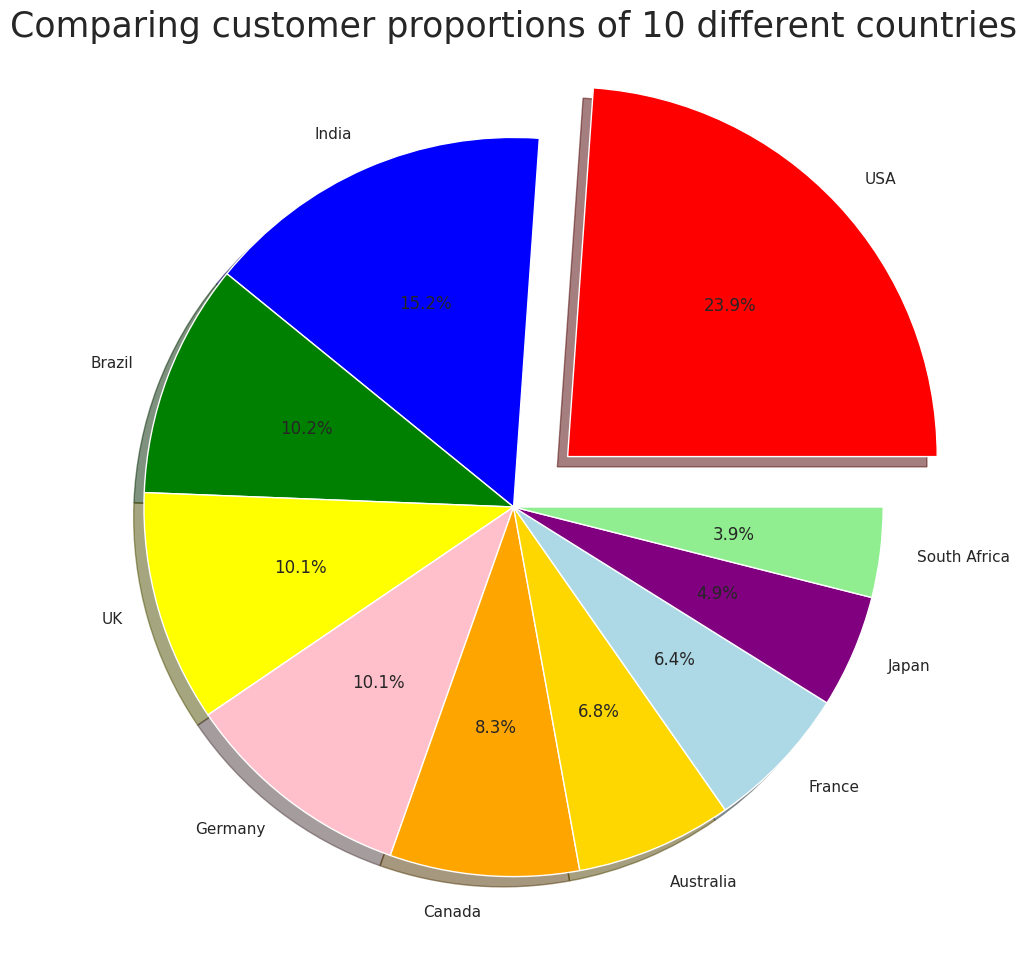

In [19]:
fig = plt.figure(figsize = (15,12))


color_list = ["red","blue","green","yellow","pink","orange",
              "gold","lightblue", "purple", "lightgreen"]


plt.pie(country_values,
        labels = country_names,
        colors = color_list,
        autopct = "%1.1f%%",
        explode = [0.2,0,0,0,0,0,0,0,0,0],
        shadow = True,

        )

plt.title("Comparing customer proportions of 10 different countries", fontsize = 25);


GDP stands for Gross Domestic Product. A GDP record website states that "GDP, or Gross Domestic Product, is the total monetary value of all goods and services produced and sold within a country during a specific time period, typically one year" ("GDP by Country").


According to the same source, it shows that the United States is the country with the biggest GDP.

Therefore, it makes sense that the United States has the highest proportion of customers in this data set.


# 🔎 SECTION C: Exploratory Data Analysis (EDA)

According to a IBM article, it states that "Exploratory data analysis is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods" (IBM).



As stated above, a popular form of EDA is Data Visualization.

* Is there any way we can visualize data so we can get a big picture of what we are dealing with?

* Even a single histogram can give us information such as the distribution of the data.   



## Histograms of Continuous Variables

Lets create histograms of multiple variables!


In [20]:
AB_df

,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,Very satisfied with my purchase.,2025-06-22
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,Good quality and value for money.,2025-10-17
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,Excellent customer service.,2025-07-01
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,Good quality and value for money.,2025-08-17
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,Excellent customer service.,2025-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,39,Female,France,45002,39,13,45.50,4,28,0.75,0,Excellent customer service.,2025-08-06
9996,9997,44,Male,USA,95367,86,41,54.22,13,17,0.19,0,"Great experience, will shop again!",2025-08-15
9997,9998,25,Female,USA,73884,33,17,49.58,4,1,0.71,0,Love the products and fast shipping.,2025-10-26
9998,9999,19,Female,USA,80849,85,12,49.20,0,18,0.33,0,Excellent customer service.,2025-09-16


Histogram of Annual Income:

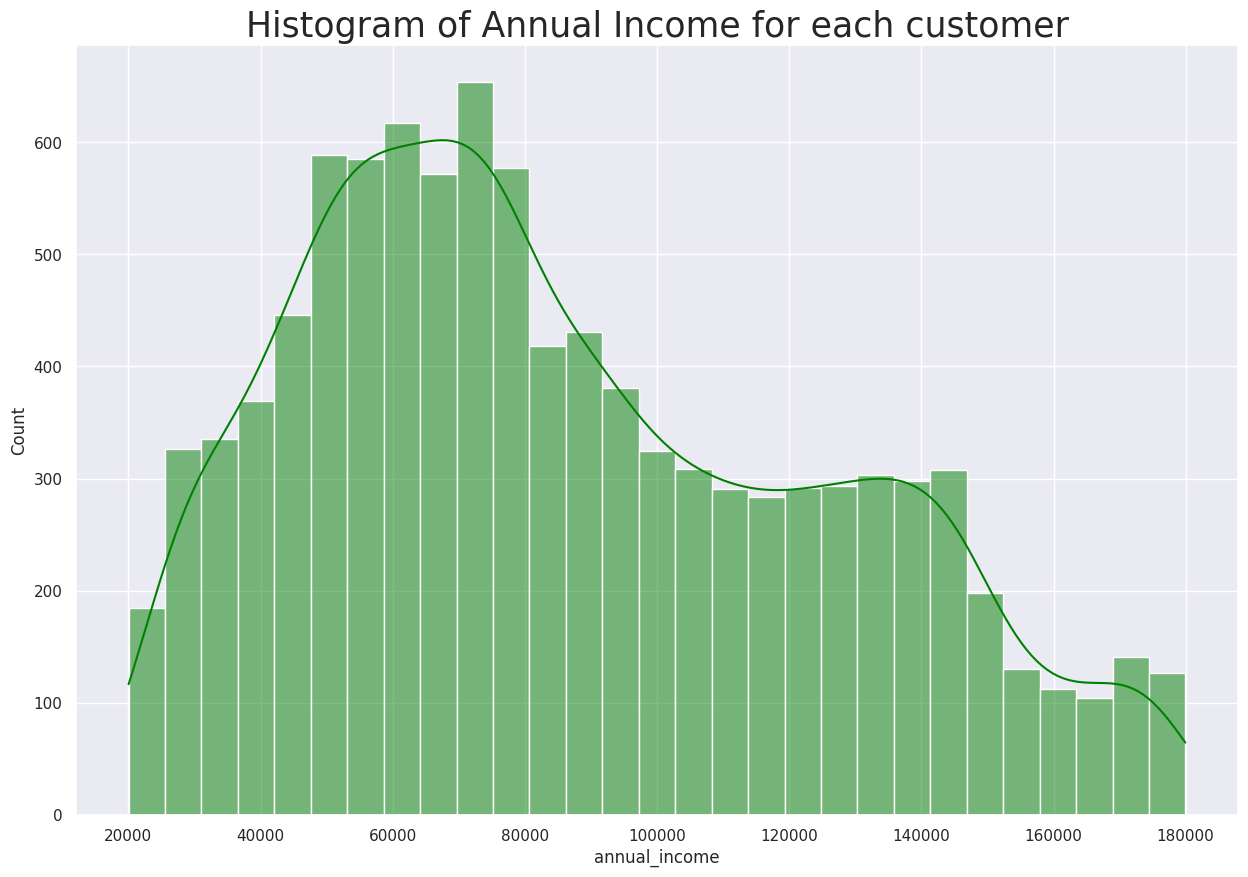

In [21]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "annual_income", kde = True, color = "green")

plt.title("Histogram of Annual Income for each customer", fontsize = 25);



Histogram of Spending Score:

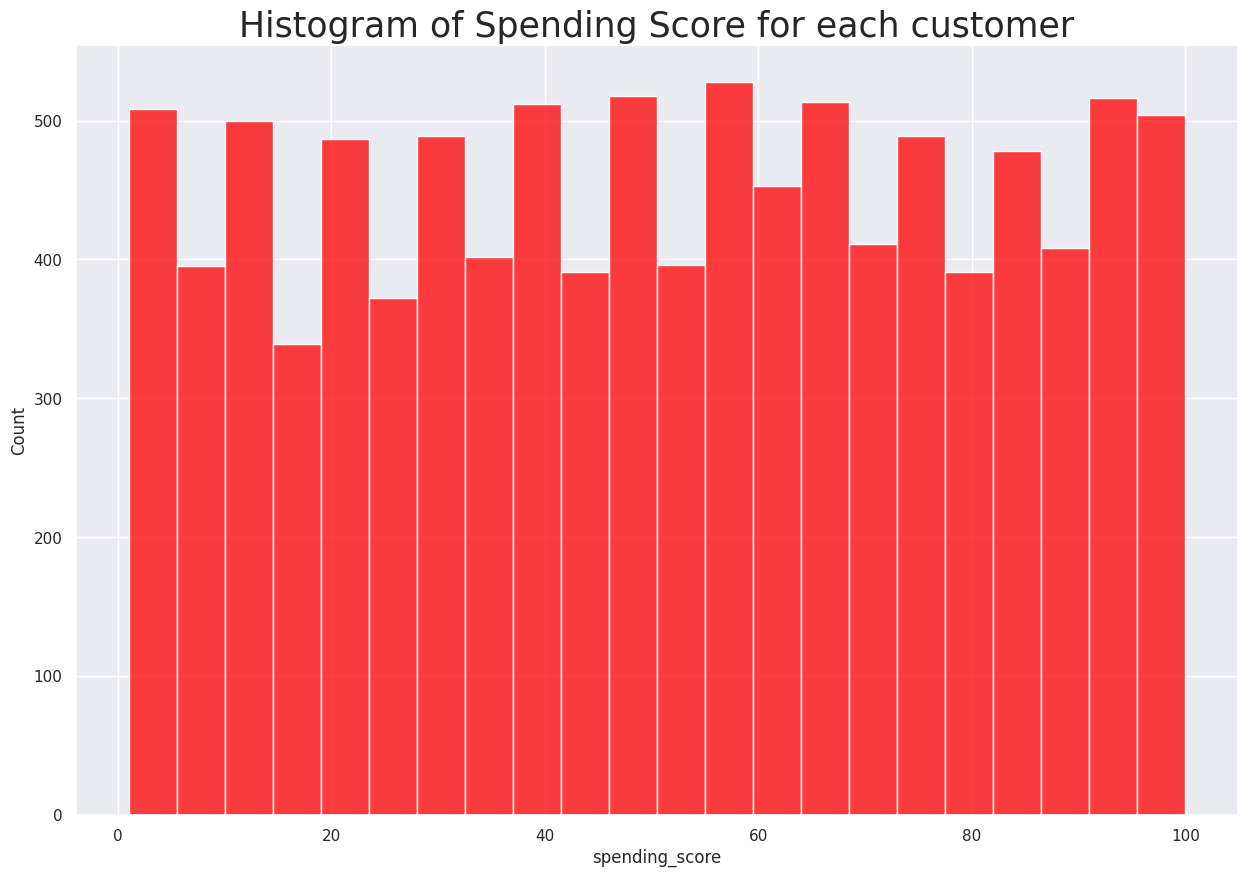

In [22]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "spending_score", color = "red")

plt.title("Histogram of Spending Score for each customer", fontsize = 25);



Histogram of Number of Purchases:

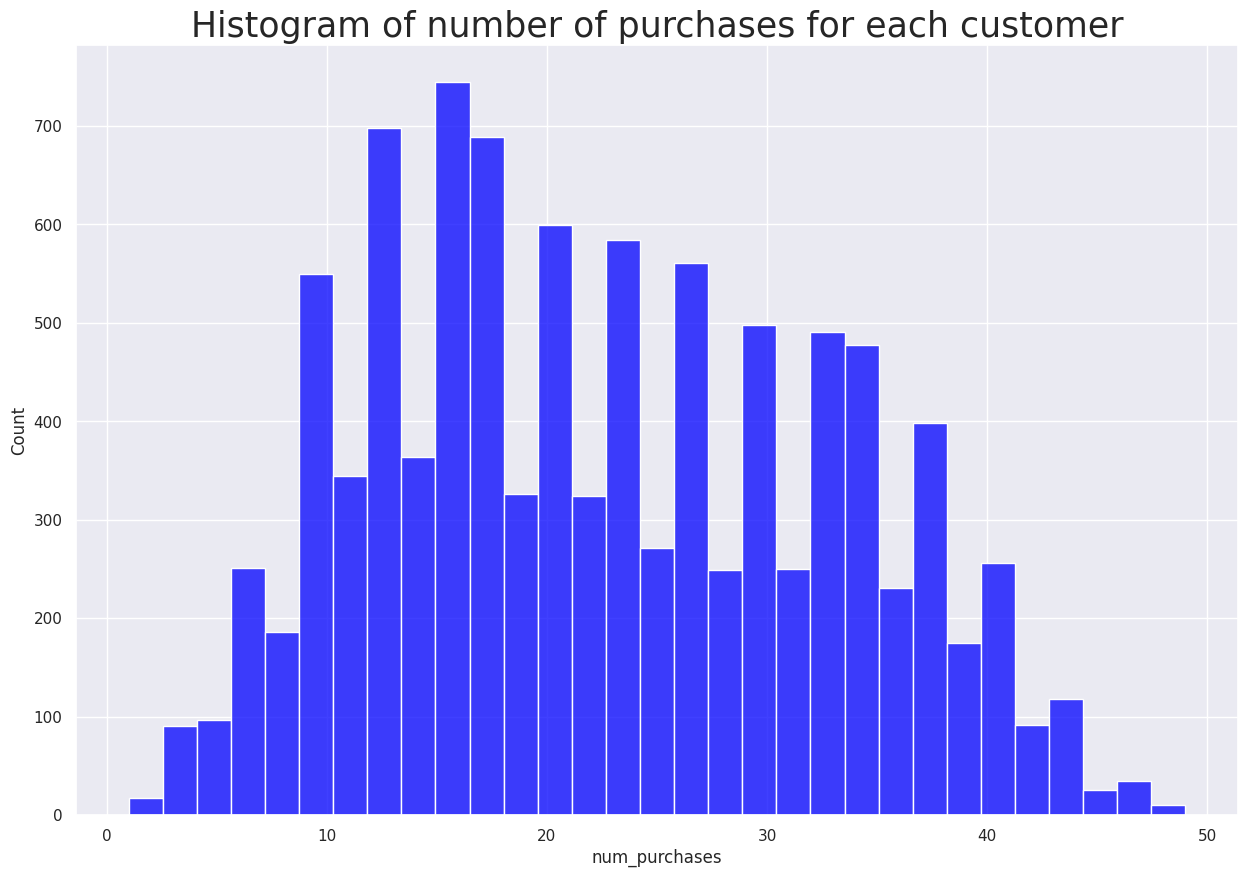

In [23]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "num_purchases", color = "blue")

plt.title("Histogram of number of purchases for each customer", fontsize = 25);



Histogram of Average Purchases:

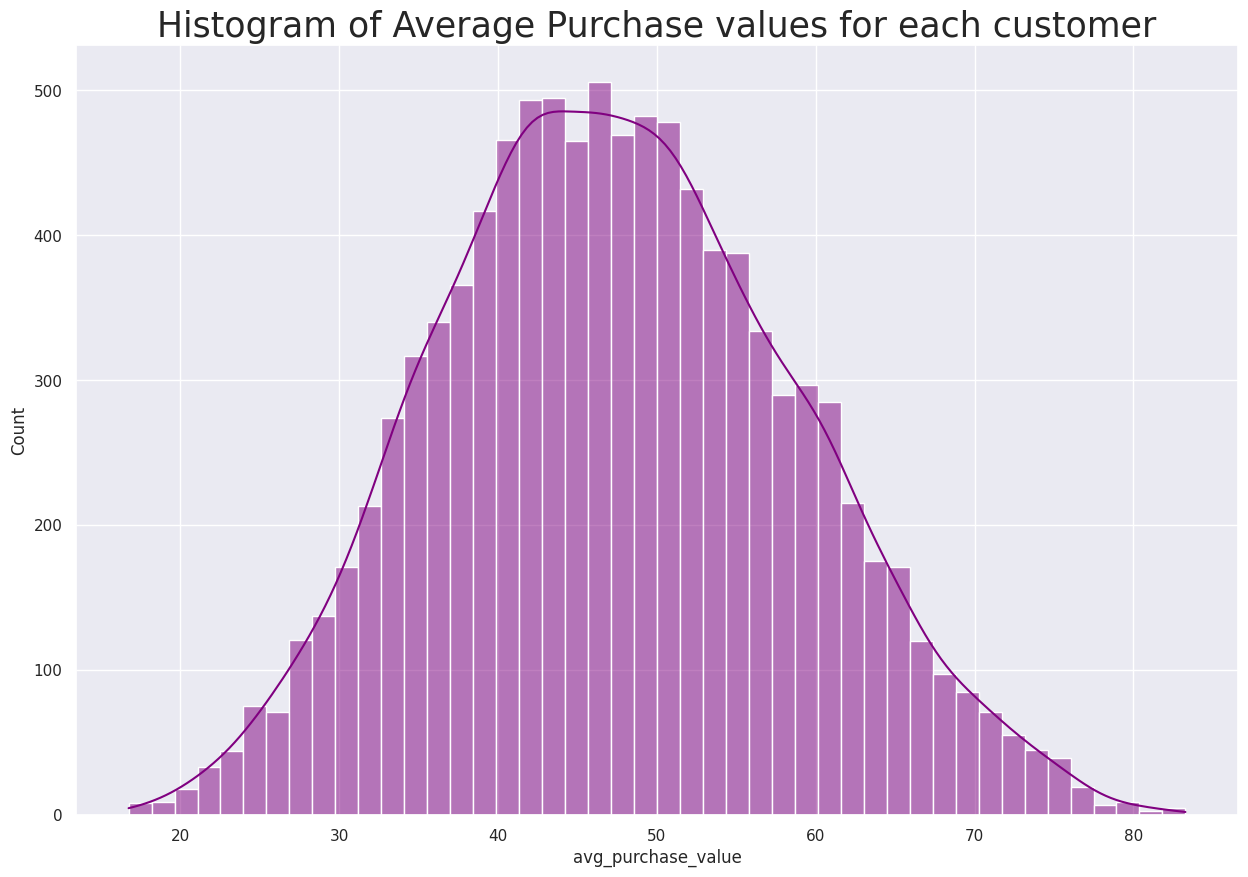

In [24]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "avg_purchase_value", kde = True, color = "purple")

plt.title("Histogram of Average Purchase values for each customer", fontsize = 25);



Histogram of Membership Years:

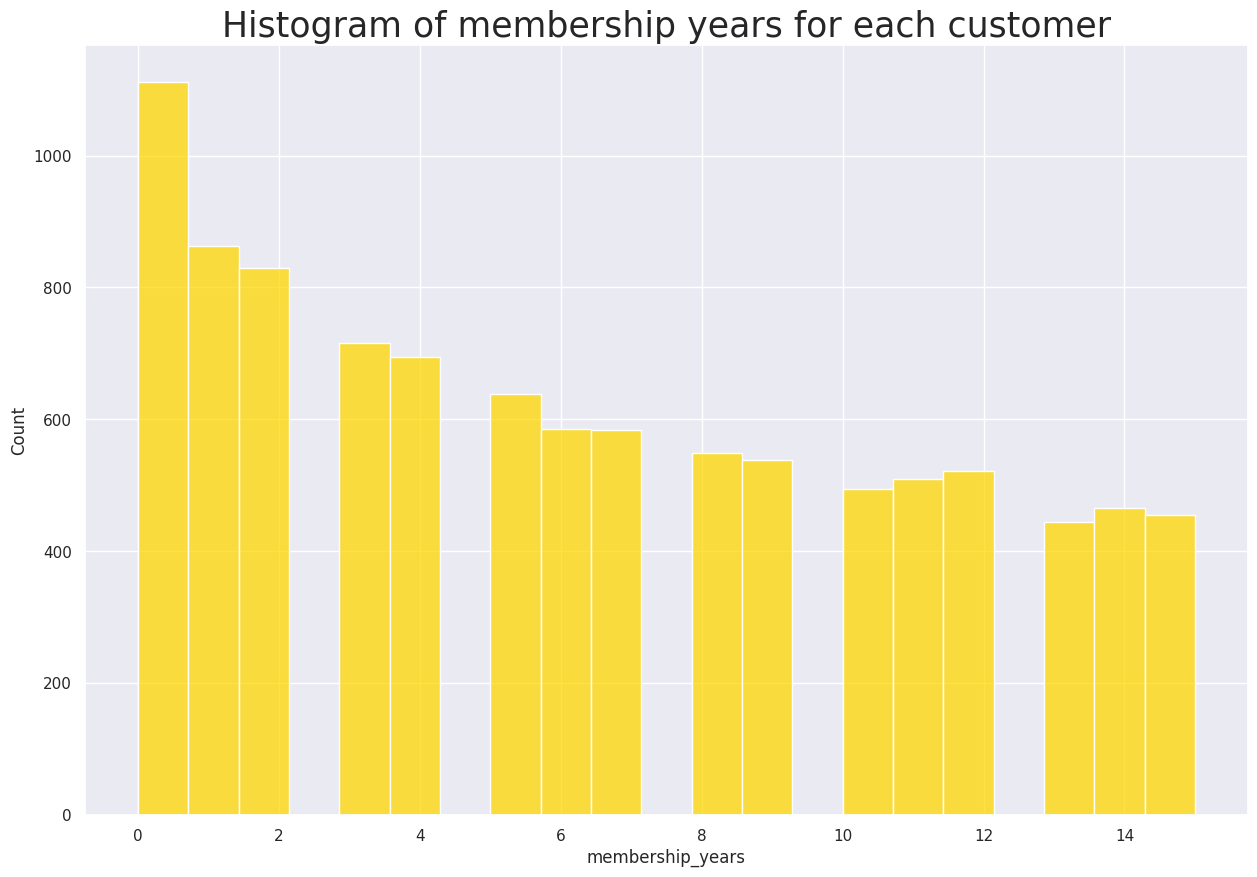

In [25]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "membership_years", color = "gold")

plt.title("Histogram of membership years for each customer", fontsize = 25);



Histogram of Website visits per month:

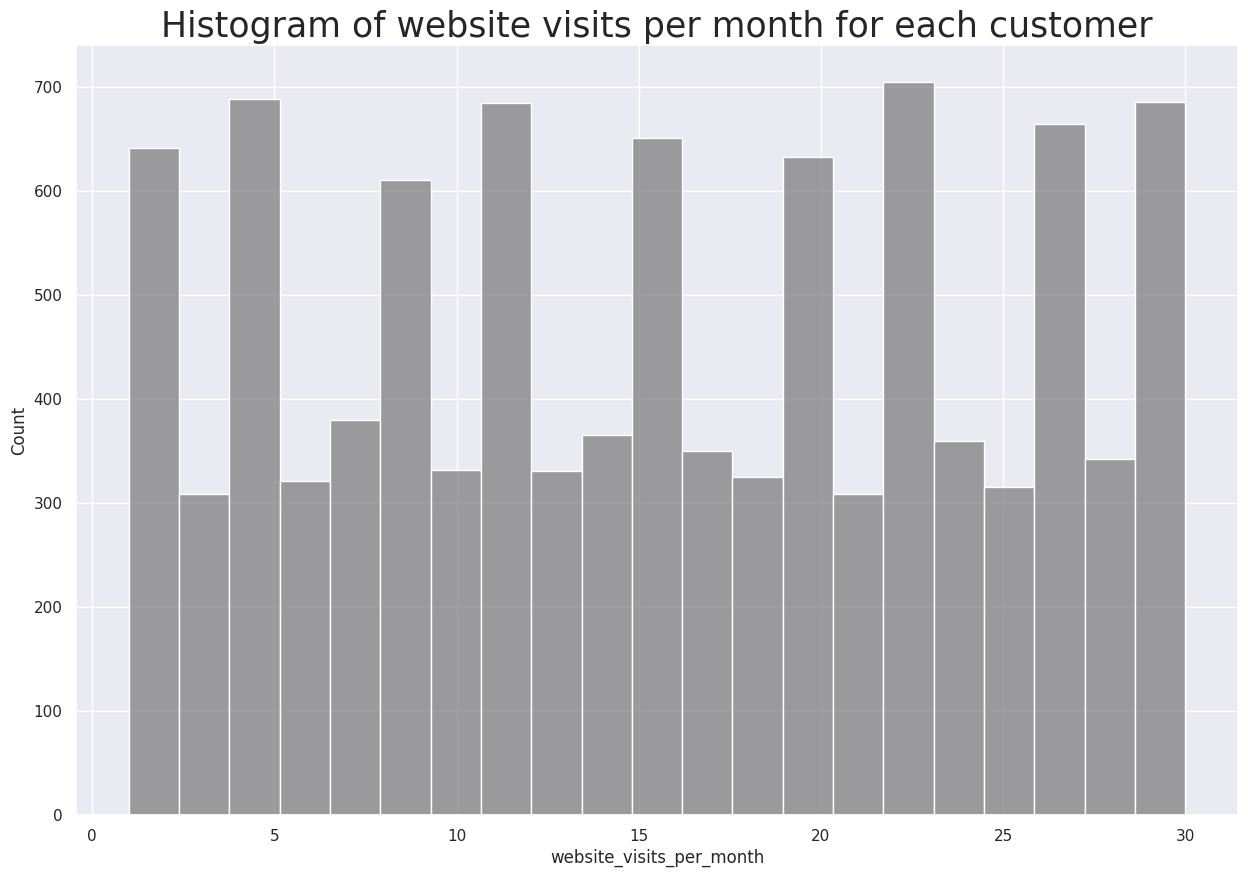

In [26]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "website_visits_per_month", color = "gray")

plt.title("Histogram of website visits per month for each customer", fontsize = 25);



Histogram of Cart Abandon Rate:

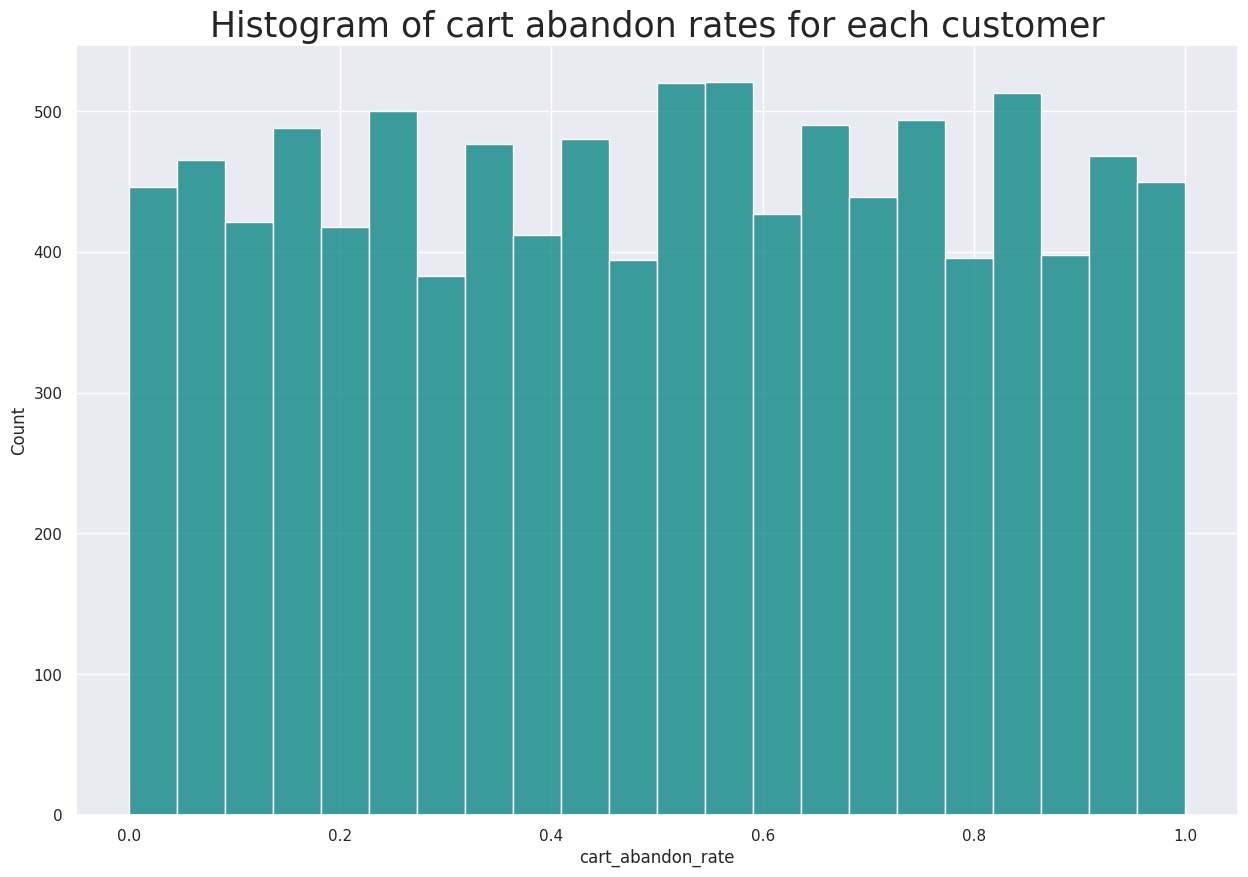

In [27]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "cart_abandon_rate", color = "teal")

plt.title("Histogram of cart abandon rates for each customer", fontsize = 25);



Histogram of Churn:


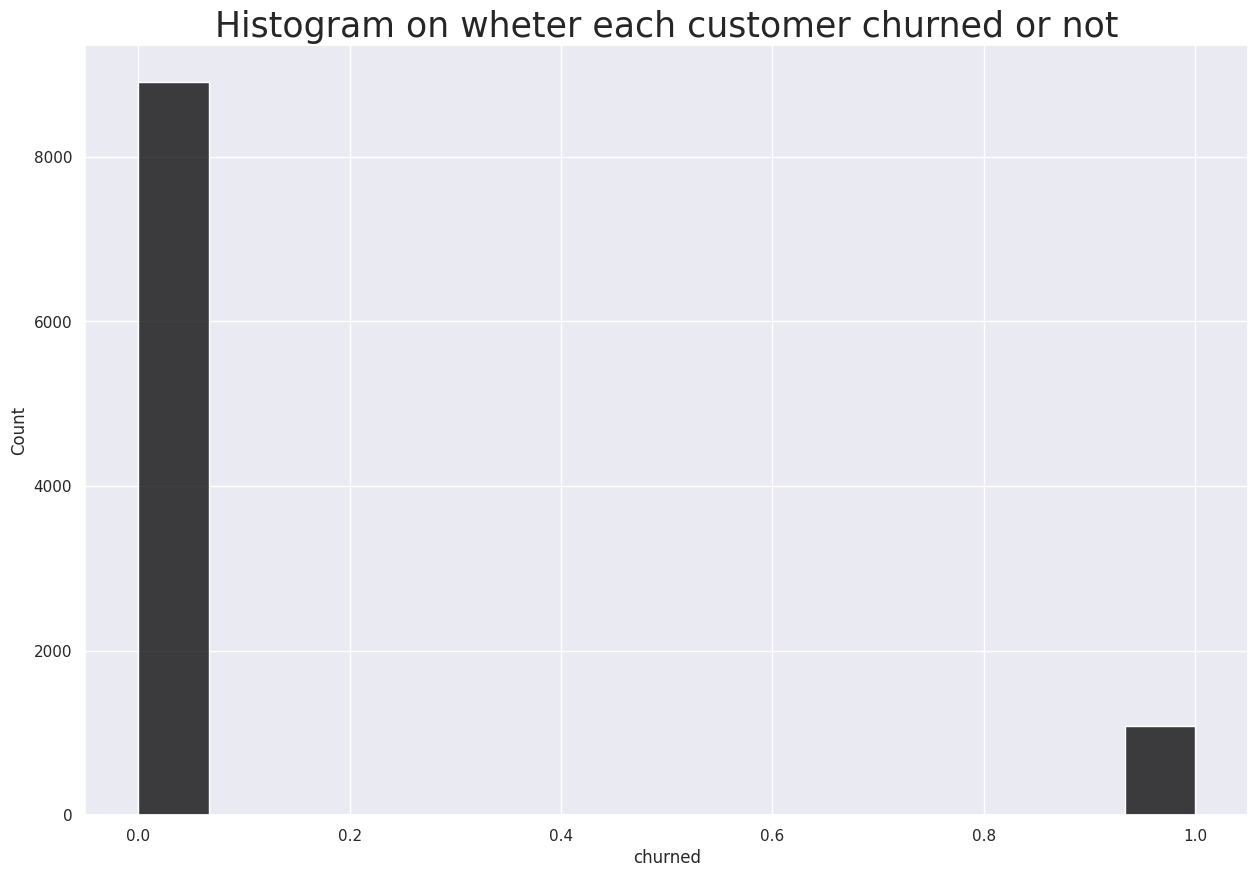

In [28]:
fig = plt.figure(figsize = (15,10))

sns.histplot(AB_df, x = "churned", color = "black")

plt.title("Histogram on wheter each customer churned or not", fontsize = 25);



# 📝 SECTION D: Hypothesis Tests, p-values, Confidence Intervals, and Rejection Regions

To understand how A/B testing works, we need to know some statistics defintions. Lets start off with statistical inference terms.


## Statistical Inference terms:

Statistical Inference is when we infer a population paramater based on a sample statistic. Here are some defintions to start us off.

* Population: The full group of interest.

EX: The population of people living in the United States

* Sample: Only a part of the full group of interest.

EX: Randomly pick 500 people in the United States.

* Parameter: A unknown but fixed value that describes a population.

EX: The population mean, $\mu$.

* Statistic: A known value based on the function of the data.

EX: The sample mean, $\bar x$.

OR maybe the sample median, $x_{0.5}$

Usually, statistics can be used as estimators. Estimators try to get a estimated value of the parameter. We put hats to denote estimators. For instance, a good estimator for the population mean $\mu$ is the sample mean $\bar x$.

$\widehat \mu = \bar x$


---


## Random Variables (RV) Case Study

Before we go on to residual assumptions lets review what a random variable is.

The definition of a random variable (RV): A variable that has a random value. The value is not a fixed constant.

* This is a example of a variable that is NOT a RV:

$$x + 2 = 5$$

In this case, $x = 3$ always. Notice $x$ is lower case here too. Lower case letters represent realized values.

* Example of a RV:

$$X \sim Unif(0,1)$$

Here, X can be any decimal value from 0 to 1 since it comes from a uniform distribution from 0 to 1. Notice that $X$ is capital here, we usually denote capital letters as a RV.

RVs apply in the real world as well! Lets say that someone tries to measure a random person's height in the United States. That person would not always be 65 inches. We could have a person with a height of 62.7 inches, 74.91 inches, and so on.

Lets pretend the people's heights are normally distributed with a population mean of 67 inches, and a population variance of 10 inches. A normal distribution is a reasonable assumption since people's heights are continous and can have decimal values, and a LOT of people live in the United States! The variable of a selected person's height is random and could be anything from this normal distribution!

The notation is:

$$X_i \sim N(\mu = 67, \sigma^2 = 10)$$

Where $X_i$ is the RV for the i-th person!

Therefore, in $e_i \sim N(0,\sigma^2)$, the residuals ($e_i$) are RVs since they can have a random value from the Normal distribution.

(This explenation originally appeared in my  Pokemon Mega Project.)

---



## Hypothesis Test

Imagine a court room. You see a defendant being tried for robbing a bank. But we want to see all the evidence and then conclude if he actually robbed the bank or not.

In the United States, courtrooms stand by the idea of: "Innocent until PROVEN Guilty."


During hypothesis testing, we have a Null Hypothesis and a Alternative Hypothesis.

* Null Hypothesis,  $H_0$:

The null hypothesis is generally the assumed value.

Back in the court room, we first assume that the defendant is innocent.

* Alternate Hypothesis, $H_a$ (or $H_1$):

The alternate hypothesis is the value that the analyst tries prove is true.

Back in the court room, the prosecutor wants to prove that the defendant is guilty. But his/her team needs evidence to prove this.


* If we do not have enough evidence, then we "fail to reject the Null Hypothesis". (aka "FTR"- fail to reject)

* If we do have enough evidence, then we "reject the Null Hypothesis".


* We do NEVER say "we accept the Null Hypothesis". It is possible that this Null Hypothesis is wrong since we almost all cases, we do NOT know the parameter value!  

* We do NEVER say "we accept the Alternate Hypothesis". In the Statistics world, we  can NEVER prove anything with 100% certanity!  


(I will explain how we will get this evidence later on.)

Now that you understand the courtroom example, lets jump into a sports example.


### Hypothesis Testing in action:









Lets pretend that we are doing a hypothesis test on Lebron James.

Lets assume that a average NBA player makes about 10 points per game.

We want to test if Lebron's average points per game is 10 points per game or NOT equal to 10 points per game.

We will test a single mean.


$H_0: \mu = 10, \text{Lebron averages 10 points per game}$

$H_a: \mu \ne 10, \text{Lebron does NOT average 10 points per game}$


WARNING: Notice that we are using parameters in our hypothesis test. This is because statistical inference is about learning more about parameters ($\mu$), NOT statistics ($\hat \mu$)!

Anyone can observe statistics such as the sample mean $\bar x$. But parameters are unknown. So why put a statistic such as $H_0: \bar x = 10$? We may have already found that $\bar x = 25.73$, so doing hypothesis tests on statistics is POINTLESS!

Now any basketball fan knows  that Lebron James averages more than 10 points per game. But we need evidence to support our thinking.

We can show statistical evidence of this in 3 ways:

1. p-value


2. Confidence Intervals


3. Rejection Regions


Lets explore these 3 aspects of statistical inference.  

---





### Hypothesis test on single mean, customer example:

According to the Federal Reserve Bank of St Louis, it states that: "the mean personal income in the United States is 67,080 as of 2024" (FRED).


Now the Federal Reserve Bank of St Louis is part of the Federal Reserve System. Therefore they have economic data of the whole United States.

Lets make a hypothesis test using this information.

❗ BE CAREFUL! We want to ONLY use the data from USA! Using different countries defeats the purpose of this hypothesis test since we ONLY know the personal average income in the USA!

* The hypothesis test:

$$H_0: \mu_{USA} = 67,080$$

$$H_a: \mu_{USA} \ne 67,080$$



In [29]:
# filter the data to include only the USA
# next, select just the annual income
usa_income = AB_df[AB_df["country"] == "USA"]["annual_income"]

usa_income

,annual_income
10,103020
16,96555
17,148387
24,60556
27,44097
...,...
9977,112668
9991,114696
9996,95367
9997,73884


In [30]:
# sample mean:
xbar = usa_income.mean()

# type cast to get rid of np.float64() -> also round by 2
xbar = round(float(xbar),2)

print("The sample mean is:",xbar)


The sample mean is: 103614.36


### What is happening and why is the sample mean way different than the null mean?

Interesting. I think we are already going to reject the null hypothesis since $\bar x_{USA} = 103614.36$ is way greater than $67080$.

Perhaps this data set has selection bias. Maybe only rich people tend to buy products in this data set.

Hypothesis tests really depend on randomly sampling, and I do not think random sampling of the United States happened here.

Even if we reject the null hypothesis, that does not mean that the USA average annual income is NOT 67080. It most likely means that our data in this data frame is not randomly sampled.

## p-value

To understand what a p-value does, we need to go over a few defintions first.





**Test Statistic:**

A numerical value that is calculated from the sample data. The value can help us determine if we reject the null hypothesis or not.

* As a note, we almost always use a t-test (t-distribution)instead of Z-test (Normal-distributon).

This is because we do almost never know the population variance and the normal distribution requires it.

We can always calculate the sample variance using the data, and thats what the t-distribution requires. So lets use the t-distribution for this project!


Here is a example of a one sample t-test statistic:

$$t_{obs} = \frac{\bar x - \mu_0}{\frac{s}{\sqrt{n}}}$$

Where:

* $t_{obs}$ is the observed test statistic.

* $\bar x$ is the sample mean. $\bar x = \frac{1}{n}\sum^n_{i=1} x_i $

* $\mu_0$ is the null hypothesis population mean value.

* $s$ is the sample standard deviation.

* $n$ is the number of observations.


**p-value:**

The probablity of obtaining data (values after the test statistic) as extreme or more extreme than what was observed (test statistic), assuming the null hypothesis is true.

There are multiple components of p-value:

* p-value is a probablity value. The only possible numbers of a p-value is from [0,1].  

* p-value is calculated assuming the null hypothesis is true.

* The p-value comes from the test statistic and it's corresponding CDF (Cumulative Distribution Function). For instance, $t_obs$'s CDF is the t-distribution.

* The lower p-value, the better, Lower p-values shows that the evidence is in favor of the alternate hypothesis.

* Think about this, a low p-value shows someone that the probablity of obtaining this data or more extreme is unlikely IF we assume the null hypothesis is true.




**Alpha Level/Significance Level:**

This is denoted by $\alpha$.

This number is selected by the data scientist.

Normally, people pick $\alpha = 0.05$. But we need to use discretion. We may want to select a smaller alpha level such as $\alpha = 0.01$ to be certain that we can reject the Null Hypothesis.



### Interpretting p-values and alpha levels

* Reject the null hypothesis:

If the p-value is less than the alpha level, then we have statisical evidence to reject the null hypothesis!

$$\text{p-value} < \alpha$$


* Fail to reject the null hypothesis:

If the p-value is greater than or equal to  the alpha level, then we do NOT have enough statisical evidence to reject the null hypothesis! We fail to reject the null.

$$\text{p-value} \ge \alpha$$





### Lebron James example Part 1:

Lets say the p-value is 0.00128, and the alpha level is $\alpha = 0.05$.

Since
$\text{p-value= .00128} < \alpha = 0.05$, we have evidence to reject the null hypothesis! We have evidence that Lebron does NOT average 10 points per game

---

**Type 1 Error:**

Type 1 Error is the probability that we reject a TRUE null hypothesis.

Reducing the alpha level also reduces the possibility of Type 1 Error.



In general, $\text{Type 1 Error} = \alpha$

**Type 2 Error:**

Type 2 Error is the probability that we FAIL to  reject a FALSE  null hypothesis.

Notice that the Type 2 Error is the OPPOSITE of Type 1 Error! So if you know what Type 1 Error is, then you know what Type 2 Error is by imagining the opposite scenario!

In general, Type 2 Error is calculated by: $\text{Type 2 Error} = \beta$



**Power:**

Power is just the ability to detect a false null hypothesis. This is the opposite of Type 2 Error.

Since Power is the opposite of Type 2 Error, it is calculated by: $\text{Power} = 1 - \beta$

We get more Power if:

1. We have large $n$. More data means less variability. Our estimates become more credible.

2. We have less variance $\sigma^2$.

3. We increase the alpha level. But be careful, this is not ethical. Increasing the alpha level means the Type 1 Error increases as well since $\text{Type 1 Error} = \alpha$

4. If the real data has a signficantly different value compared to the null hypothesis, then Power increases.

But we can not just pick a small null hypothesis and say we got more power. We want to pick a null hypothesis that we think is close to the real value.




---

### p-value on single mean, customer example:

Lets set the alpha level as: $\alpha = 0.01$


In [31]:
xbar = usa_income.mean()
print("The sample mean is:", round(xbar,3))

mu_0 = 67080 # our null hypothesis population mean


s = np.std(usa_income)
print("The sample standard deviation is:", round(s,3))


n = len(usa_income)
df = n - 1
print("The number of observations is:", n)
print("The degrees of freedom is:", df)


t_obs = (xbar - mu_0) / (s / np.sqrt(n))

print("The observed t-test statistic is:", round(t_obs,3))





The sample mean is: 103614.36
The sample standard deviation is: 35986.775
The number of observations is: 2389
The degrees of freedom is: 2388
The observed t-test statistic is: 49.621


Now we can get our p-value. This is for a two sided hypothesis test:

In [32]:
# Getting our p-value.
p_value = 2 * (1 - stats.t.cdf(abs(t_obs), df))

print("The p-value is:", p_value)

The p-value is: 0.0


Since the p-value is essentially 0, then $p-value = 0.0 < \alpha = 0.01$.

We have enough evidence to reject the null hypothesis that the population mean is 67080 for the annual income of the USA. (But we know sampling bias could have occured, so we will examine this conclusion more in depth later.)

So that was the hand made code method to find the p-value. What about getting the p-value in one line of code?


In [33]:
p_value = stats.ttest_1samp(usa_income, popmean = mu_0).pvalue
print("The p-value is:", p_value)




The p-value is: 0.0


The "stats.ttest_1samp()" code actually gives multiple values:

In [34]:
stats.ttest_1samp(usa_income, popmean = mu_0)


TtestResult(statistic=np.float64(49.61074347546855), pvalue=np.float64(0.0), df=np.int64(2388))

## Confidence Interval

A Confidence Interval (CI) is a interval that tries to capture where a parameter could be.  


Here is a Confidence Interval for a t-distribution:

$$\bar x \pm t_{df, (1- \frac{\alpha}{2})} * \frac{s}{\sqrt{n}}$$

$$(\bar x - t_{df, (1- \frac{\alpha}{2})} * \frac{s}{\sqrt{n}}, \bar x + t_{df, (1- \frac{\alpha}{2})} * \frac{s}{\sqrt{n}} )$$

Where:

* $\bar x$ is the sample mean.

* $\alpha$ is the alpha level.

* $df$ is the degrees of freedom, where $df = n - 1$

* $t_{df, (1- \frac{\alpha}{2})}$ is the critical value.

* $s$ is the standard error.

* $n$ is the number of observations.


* The standard error is: $SE(\bar x) = \frac{s}{\sqrt{n}}$

* The margin of error is: $MOE = t_{df, (1- \frac{\alpha}{2})} * \frac{s}{\sqrt{n}}$


So now we made a confidence interval. Now what?

Well lets recall that we have alpha level. Depending on the alpha level, that is the percent confidence interval (CI) we have:

$$(1-\alpha)\% \text{ CI}$$

If $\alpha = 0.05, then we have a 95% CI.

$$(1-\alpha)\% \text{ CI} = (1-0.05)\% \text{ CI} = (0.95)\% \text{ CI}$$

This means that we are 95% confident that our CI contains the population mean $\mu$. (Or another parameter depending on our distribution.)

The main idea of a CI is to find out what






(Side note, we can NOT say that there is a 95% probability that the true mean value $\mu$ lands in the 95% CI, because these are parameters and parameters have a fixed value. We can not speak probabilistically about them! We can only speak probabilistically of random variables (RV) such as $\bar x$. Estimators and CIs are RV because they are functions of data, and data can give different numbers. CIs are basically just RV and some numbers, but that still counts as a RV. Parameters are unknown, but they they are fixed and constant numbers. )


---






### Lebron James example Part 2:

Recall that $H_0: \mu = 10, \text{Lebron averages 10 points per game}$. Is this value in our CI?

Lets say CI is $(24.094,31.836)$. $\mu_0 = 10$ is DEFINTELY not contained in this CI!

We have 95% confidence that this CI captures the true population $\mu$. If we think that $\mu = 27$, then that guess is plausible. But $\mu = 10$ seems off target.







Since $\mu_0 = 10$ is not in our CI, we have evidence to reject the null hypothesis! We have evidence that Lebron does NOT average 10 points per game!

---

### Confidence Interval on single mean, customer example:


In [35]:
# Recall that:

xbar = usa_income.mean()
print("The sample mean is:", round(xbar,3))

mu_0 = 67080 # our null hypothesis population mean


s = np.std(usa_income)
print("The sample standard deviation is:", round(s,3))


n = len(usa_income)
df = n - 1
print("The number of observations is:", n)
print("The degrees of freedom is:", df)







The sample mean is: 103614.36
The sample standard deviation is: 35986.775
The number of observations is: 2389
The degrees of freedom is: 2388


In [36]:
# Lets make our CI using the information above, and some new code:

# alpha level/ significance level:
alpha = 0.01

# ALERT: ppf stands for "percent point function" AKA the Inverse CDF!

# the critical region:

t_star = stats.t.ppf(1 - alpha/2, df)

print("The critical region is:", round(t_star,3))

# Margin of error = critical region * standard error
MOE =  t_star * (s / np.sqrt(n))

print("Margin of Error value:", round(MOE,3))

# lower limit:
LL = xbar - MOE
LL = round(float(LL),3)


# upper limit:
UL = xbar + MOE
UL = round(float(UL),3)

# 99% CI:
CI = (LL,UL) # type cast and round

print("The 99% CI is:", CI)


The critical region is: 2.578
Margin of Error value: 1898.013
The 99% CI is: (101716.347, 105512.373)


Since our null mean value of  $\mu_{USA} = 67080$ is NOT contained inside the 99% CI of  $(101716.347, 105512.373)$, we have enough evidence to reject the null hypothesis! We are 99% confidence that this CI captures the population mean, and 67080 is not inside that CI!

Is there a way to make CI with one line of code?

YES! Lets do it right now!


In [37]:
# 1. (1-alpha)% CI
# 2. df = n - 1
# 3. loc = sample mean! NOT population mean or null mean!
# 4. scale = SE(xbar) AKA stats.sem(x_vector)

CI = stats.t.interval(1-alpha, df = df, loc = xbar, scale = stats.sem(usa_income))

print("The 99% CI is:", np.round(CI,3))



The 99% CI is: [101715.95  105512.771]


The hand made CI and the the stats.t.interval CI appear to be similar!


---

### One sided Confidence Intervals

The above example was about a two sided CI.

What if we wanted a one sided CI?

Then the formulas would be different. The hypothesis tests would be different as well.

* Let $A$ be a number value calculated by a CI.


1. Upper one sided CI:

* The Null Hypothesis is $H_0: \mu \le 10$

* The Alternate Hypothesis is $H_a: \mu > 10$ (We want $\mu$ to NOT be in the CI to reject the Null Hypothesis)

$$(-\infty, A]$$

Where:

$$\bar x -  t_{df, 0} = -\infty$$

And,

$$\bar x + t_{df, (1- \alpha)} = A$$

**WARNING:** Notice that we do NOT use $(1- \frac{\alpha}{2})$ for the critical region!!! That only applies for two sided CIs! For a one sided CI, we use $(1- \alpha)$ instead!


2. Lower one sided CI:


* The Null Hypothesis is $H_0: \mu \ge 10$

* The Alternate Hypothesis is $H_a: \mu < 10$ (We want $\mu$ to NOT be in the CI to reject the Null Hypothesis)

$$[A, \infty)$$


Where:

$$\bar x - t_{df, (1- \alpha)} = A$$

And,

$$\bar x + t_{df, 0} = \infty$$


**WARNING:** Notice that we do NOT use $(1- \frac{\alpha}{2})$ for the critical region!!! That only applies for two sided CIs! For a one sided CI, we use $(1- \alpha)$ instead!



* NOTE: For this Project, there will be a main focus on two sided CIs and two sided hypothesis tests. Most A/B testing experiments use a two sided test because measuring any kind of difference is more standard and safer.

---


## Rejection Region

Rejection Region uses the critical regions of a distribution.

For simplicity, lets use a normal distribution. For a two sided hypothesis test, the Z scores of the 95% percentiles are:

$$z_{\frac{0.05}{2}} = -1.96$$

$$z_{1 - \frac{0.05}{2}} = 1.96$$

So if Z test statistic $z_{obs}$ is lower than $-1.96$ or higher than $1.96$, then we can reject the null hypothesis! We need the test statistic to be in the rejection region to reject the null hypothesis.

Our rejection region in this scenario is:

$$z_{obs} < -1.96 \text{ OR } z_{obs} >1.96$$


---




### Lebron James example Part 3:

---



Lets say the test statistic is $t_{obs} = 4.23$.

Lets say that the rejection region is:

$$t_{obs} < -2.12 \text{ OR } t_{obs} > 2.12$$



Since $t_{obs} = 4.23 > 2.12$, we have evidence to reject the null hypothesis! We have evidence that Lebron does NOT average 10 points per game

---

### Rejection Region on single mean, customer example:

Scipy does not have a built in code for Rejection Regions, we need to hand make this ourselves!



In [38]:

rejection_region = (round(float(stats.t.ppf(alpha/2, df)),3),
                    round(float(stats.t.ppf(1 - alpha/2, df)),3))

print("The rejection region is:", rejection_region )
print("Recall that the observed test statistic is:", round(t_obs,3))


The rejection region is: (-2.578, 2.578)
Recall that the observed test statistic is: 49.621


Since the test statistic of 49.621 is OUTSIDE the rejection region, of (-2.578, 2.578), we can reject the null hypothesis!



### So we rejected the null hypothesis for the customer example. Does that mean that US population does not have a average annual income of 67080?

* NO! We can NOT be slaves to what the data or results tell us! We need to think analytically and outside of the box! We ALWAYS have to consider CONTEXT of the data!

* I mentioned that there is a strong possibility that sampling bias that occured! Perhaps this data set only included mainly middle class and rich class customers!

* For a sample to truly be representative of a population, we need a RANDOM sampling process! We can suspect that it is possible that randomly sampling did NOT happen here!


**CONCLUSION:**

In this example, our test statistics, p-values, and confidence intervals, are not credible. Either we need a hypothesis that makes sense or we need truly random sampled data!

---

## So do we need to check all 3 methods of p-value, confidence intervals, and rejection regions?


No. We just need to check the p-value and see if it is less than the alpha level to reject the null hypothesis, or fail to reject in the case the p-value is greater than the alpha level.


Checking only the p-value is sufficient enough since all 3 methods will either result in rejecting the null hypothesis, or failing to reject the null.

We will NOT have a scenario where the p-value will reject the null hypothesis, but the CI fails to reject the null hypothesis.

From now on, simply using the p-value is good enough.

---

# 👨‍👦 SECTION E: Diving into A/B Testing

A/B testing is just two sample testing. Thats it!


The main idea of A/B testing is if there is a difference from group A or group B. Many A/B tests deal with a control and a treatment group.

Lets start off by defining what the hypothesis tests look like:

## Two sample Mean tests

When we want to find if two populations are different or not, we use the following hypothesis test:

$$H_0: \mu_A = \mu_B,  \text{(The population means are the same.) }$$

$$H_a: \mu_A \ne \mu_B,  \text{(The population means are NOT the same.) }$$


Alternatively, we can do:

$$H_0: \mu_A - \mu_B = 0,  \text{(The population means are the same.) }$$

$$H_a: \mu_A - \mu_B \ne 0,  \text{(The population means are NOT the same.) }$$


* So what are the formulas for the test statistic $t_{obs}$? It depends on the variance of both groups. Do the groups have similar variances or different variances?


## Scenario 1: Equal Variances for both groups

If we think that the variances for both groups are the same, then we use this test statistic formula:


$$t_{obs} = \frac{\bar x_A - \bar x_B}{s_p \sqrt{\frac{1}{n_A} + \frac{1}{n_B}}}$$

Where the pooled variance $s_p$ formula is:

$$s_p = \sqrt{\frac{(n_A -1)* s^2_A + (n_B -1)* s^2_B}{n_1 + n_B - 2}}$$

Degrees of freedom are calculate differently from a single mean test:

$$df = n_A + n_B - 2$$

Where:

* $\bar x_A$ and $\bar x_B$ are the sample means for group A and group B respectively.

* $n_A$ and $n_B$ are the sample size for group A and group B respectively.




## Scenario 2: Un-Equal Variances for both groups


If we think that the variances for both groups are the NOT the same, then we use this test statistic formula:


$$t_{obs} = \frac{\bar x_A - \bar x_B}{\sqrt{\frac{s^2_A}{n_A} + \frac{s^2_B}{n_B} } }$$


The degrees of freedom is calculated with a big formula. We even have a special name for the degrees of freedom of unequal variances, the Satterthwaite degrees of freedom:

$$df = \frac{(\frac{s^2_A}{n_A} + \frac{s^2_B}{n_B})^2}{\frac{(\frac{s^2_A} {n_A})^2}{n_A-1} + \frac{(\frac{s^2_B} {n_B})^2}{n_B-1}}$$



NOTE: This type of degrees of freedom can have decimal values!




### How do we know if the population variances are equal or not?

Well one way to determine this is by checking the sample variances for group A and group B. If they are similar, they can be assumed to have equal variances.

If one sample variance is bigger by a factor of 3, then we assume unequal variances. Lets go over those formulas next.

We can check the sample variance be doing "series_name.var()".


## APPLICATION: A/B Testing for two Means (Male and Female annual_income Means)



Recall in Section B we grouped the data by males and females. Here is a refresher:

In [39]:
male_female_df = AB_df.groupby(["gender"]).mean(numeric_only = True)

male_female_df





,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned
gender,,,,,,,,,,
Female,4972.579704,44.130038,86436.426170,50.911687,22.611910,47.495121,6.346972,15.466680,0.502188,0.105732
Male,5027.725459,43.963658,85708.102903,50.936401,22.540984,47.401025,6.334189,15.686747,0.500269,0.112186


All the variable mean values seem similar for both Female and Male. But annual_income seems to have somewhat different values.

Lets do a A/B Test on two means for Female and Males annual_income!



### Hypothesis Test:

Lets test the annual_income means of:

$$H_0: \mu_{Female} - \mu_{Male} = 0$$

$$H_a: \mu_{Female} - \mu_{Male} \ne 0$$


Lets first discover if the sample variances for both the Female and Male groups are similar!

Lets also set our alpha level to be: $\alpha = 0.05$


In [40]:
# alpha level checker

def alpha_level_checker(p_value, alpha_level):
  if p_value < alpha_level:
    print("Since p_value < alpha_level, we have enough evidence to reject the null hypothesis!")
  else:
    print("Since p_value >= alpha_level, we fail to reject the null hypothesis, we do not have enough evidence.")

# set alpha = 0.05

alpha = 0.05


In [41]:
# first filter the data to get female and male groups:

female_income = AB_df[AB_df["gender"] == "Female"]["annual_income"]
# print("Series of female income:", female_income)

male_income = AB_df[AB_df["gender"] == "Male"]["annual_income"]
# print("Series of male income:", male_income)



# second get sample means:

# female sample mean:
xbar_f = float(AB_df[AB_df["gender"] == "Female"]["annual_income"].mean())
print("Female Income sample Mean:", round(xbar_f,3))

# male sample mean:
xbar_m = float(AB_df[AB_df["gender"] == "Male"]["annual_income"].mean())
print("Male Income sample Mean:", round(xbar_m,3))


print() # extra space

# secondly filter the data to get the sample variances

# female sample variance:
s2_f = float(AB_df[AB_df["gender"] == "Female"]["annual_income"].var())
print("Female Income sample Variance:", round(s2_f,3))

# male sample variance:
s2_m = float(AB_df[AB_df["gender"] == "Male"]["annual_income"].var())
print("Male Income sample Variance: ", round(s2_m,3))


print()

# Is one of the sample variances bigger than a factor of 3?

print("Sample variance ratio:", round(s2_f/s2_m,3) )



Female Income sample Mean: 86436.426
Male Income sample Mean: 85708.103

Female Income sample Variance: 1543999425.431
Male Income sample Variance:  1496576317.323

Sample variance ratio: 1.032


Since the sample variance is 1.032 and not 3, we can assume equal variances.

THEREFORE, lets use the equal variance  test statistic! (Check scenario 1)

**NOTE:** Since I already did handmade coding for the single mean tests, I will focus on built in tests for future statistical tests.  


### p-value:


In [42]:
from scipy.stats import ttest_ind

# 2 sample t-test code format:
# ttest_ind(vector_A, vector_B, equal_var = True/False)

# ALERT: do NOT do: ttest_ind(mean_A, mean_B, equal_var = True/False)
# WE WANT DATA, NOT sample means!

# t_obs -> the t-test statistic

t_obs, p_value = ttest_ind(female_income, male_income, equal_var = True )

print("The t-test statistic:", round(t_obs,3))
print("The p-value: ", round(p_value,3))


print()

alpha_level_checker(p_value, alpha)


The t-test statistic: 0.934
The p-value:  0.35

Since p_value >= alpha_level, we fail to reject the null hypothesis, we do not have enough evidence.


### Conclusion:

Since $p-value = 0.35$ is greater than $\alpha = 0.05$, we fail to reject the null hypothesis!

We conclude that we do not have enough evidence to say that average annual income levels for females and males are different!

We just did our first A/B Testing, huraahhh!

But A/B Testing does not just use different means, lets examine a A/B Testing that uses different proportions.

## Two sample Proportion tests

In the real life, A/B tests usually measure a metric such as wheter a person clicked a link or not.


In this case, we would use sample proportions ($\hat p$), not sample means ($\bar x$).



### Hypothesis test for population proportions

We first assume the proportions are similar, we do:

$$H_0: p_A = p_B, \text{ The population proportions are the same}$$

$$H_0: p_A \ne p_B, \text{ The population proportions are NOT the same}$$


### Test statistic for two proportions

* We first need to make pooled $\hat p$.

$\widehat p_T = \frac{x_A + x_B}{n_A + n_B}$


* Next, we calculate our test statistic $Z_{obs}$:

$$Z_{obs} = \frac{\widehat p_A - \widehat p_B}{ \sqrt{\widehat p_T (1 - \widehat p_T) (\frac{1}{n_A} + \frac{1}{n_B}) )  } }$$


Where:

* $x_A$ and $x_B$ are the number of group A and group B "successes" respectively.

* $n_A$ and $n_B$ are the number of group A and group B observations respectively.


* $\widehat p_A = \frac{x_A}{n_A}$ is the sample proportion of group A.


* $\widehat p_B = \frac{x_B}{n_B}$ is the sample proportion of group B.



### Why are we using a Z-test statistic instead of t-test statistic?

We use a Z-test because the proportions can be approximately normally distributed. Recall that we use Z-tests when we use a normal distribution!


Firstly, we need to satisfy the general conditions of:

$n_A \widehat p_A \ge 5$

$n_A (1-\widehat p_A) \ge 5$

$n_B \widehat p_B \ge 5$

$n_B (1-\widehat p_B) \ge 5$

Using a proportions test will give a credible Z-score!

Secondly, if these conditions are met, the sample proportion of succceses $\hat p = \frac{x}{n}$ is approximately Normal($p,\frac{p(1-p)}{n}$).

$$\widehat p \sim N(p,\frac{p(1-p)}{n})$$




## APPLICATION: A/B Testing for two Proportions (USA vs non-USA country churn rates)



What if we check the Churn of the customers from the USA vs any other country?

Recall that Churned just means a customer stopped using a product or service.

In [43]:
# create churn series:
usa_churn = AB_df[AB_df["country"] == "USA"]["churned"]
other_churn = AB_df[AB_df["country"] != "USA"]["churned"]

# usa churn sample proportion:
p_hat_usa = usa_churn.mean()
print("USA's churn proportion:", round(p_hat_usa,3))

# other churn sample proportion:
p_hat_other = other_churn.mean()
print("Other countries's churn proportion:", round(p_hat_other,3))


print() # extra space

# lets find the number of observations for each group:

n_usa = len(usa_churn)
print("Number of customers in the USA:", n_usa)

n_other = len(other_churn)
print("Number of customers in other countries:", n_other)

USA's churn proportion: 0.1
Other countries's churn proportion: 0.112

Number of customers in the USA: 2389
Number of customers in other countries: 7611


Oof, it appears that the USA and other countries seem to have similar churn proportions. Lets make it official by doing a 2 proportions test.

### Hypothesis Test:

Let us test:

$$H_0: p_{USA} - p_{other} = 0$$

$$H_a: p_{USA} - p_{other} \ne 0$$


**WARNING:** SciPy does NOT have the two proportions test. We will have to use another model called statsmodel.


### p-value:

In [44]:
from statsmodels.stats.proportion import proportions_ztest

churn_list = [p_hat_usa, p_hat_other]

n_list = [n_usa, n_other]

z_obs, p_value = proportions_ztest(churn_list, n_list, alternative = "two-sided")


print("The z test statistic is:", round(z_obs,3))
print("The p-value is:", round(p_value,3))

alpha_level_checker(p_value, alpha)


The z test statistic is: 0.253
The p-value is: 0.8
Since p_value >= alpha_level, we fail to reject the null hypothesis, we do not have enough evidence.


### Conclusion:

Since $p-value = 0.80$ is greater than $\alpha = 0.05$, we fail to reject the null hypothesis!

We conclude that we do not have enough evidence to say that average churn proportions for the USA and other countries are different!

It is surprising to see that the p-value was 0.80, that is extremely high.

Lets do one more A/B test. But this A/B test will be a interesting one, we will be using word ratings from customers.

# 🌴 SECTION F: Combining Natural Language Processing (NLP) and A/B Testing

According to a AWS website, it states that "Natural language processing (NLP) is technology that allows computers to interpret, manipulate, and comprehend human language ... Natural language processing is key in analyzing this data for actionable business insights ("NLP Explained - AWS").





* One application of NLP is sentiment analysis. This is simply a process where we try to find any positive or negative words in a text, and assign them values. Lets use this application of NLP!



* What if we analyze which genders tend to be more satisified using customer text ratings?



To do sentiment analysis, lets assign:

* Lets give 1 point to any positive words such as: "good", "fast", "amazing"

* Lets give a -1 point to any negative words such as: "bad", "poor", "slow"



---

### Editing and examing the text data:

Lets see our text data:


In [45]:
AB_df["feedback_text"]




,feedback_text
0,Very satisfied with my purchase.
1,Good quality and value for money.
2,Excellent customer service.
3,Good quality and value for money.
4,Excellent customer service.
...,...
9995,Excellent customer service.
9996,"Great experience, will shop again!"
9997,Love the products and fast shipping.
9998,Excellent customer service.


We will probably need to standardize the text so that it is all lower case. That way, we do not have to run into any complications that deal with capitalization cases!

In [46]:
# assign the edited lower case text to the original text!
AB_df["feedback_text"] = AB_df["feedback_text"].str.lower()

AB_df["feedback_text"]





,feedback_text
0,very satisfied with my purchase.
1,good quality and value for money.
2,excellent customer service.
3,good quality and value for money.
4,excellent customer service.
...,...
9995,excellent customer service.
9996,"great experience, will shop again!"
9997,love the products and fast shipping.
9998,excellent customer service.


That seems to do the trick!

Lets also remove punctuation marks such as periods, commas, question marks, and exclamation marks.

In [47]:
import string # this is the library that deals with strings

# ALERT:
# str.maketrans(x, y, z)

# x-> character to replace.
# y-> character to that will replace x
# z-> character that completely deletes

# str.maketrans("", "", string.punctuation)

# nothing gets replaced
# only punctiation marks get deleted


# function:
def clean_text(the_text):
  # remove punctuation symbols
  translator_variable = str.maketrans("","",string.punctuation)

  # the_text is our parameter
  # the_text.translate uses our translator_variable to make edits!

  the_text = the_text.translate(translator_variable)

  return the_text


# clean the feedback_text series:
# use .apply()

clean_series = AB_df["feedback_text"].apply(clean_text)


# create a new variable

AB_df["clean_feedback_text"] = clean_series


AB_df["clean_feedback_text"]

,clean_feedback_text
0,very satisfied with my purchase
1,good quality and value for money
2,excellent customer service
3,good quality and value for money
4,excellent customer service
...,...
9995,excellent customer service
9996,great experience will shop again
9997,love the products and fast shipping
9998,excellent customer service


Ok, we now have no punctuation marks.

We need to do one more thing. We need to make a list of positive and negative words.

We first need to find the unique words of the feedback_text!

In [48]:


AB_df["clean_feedback_text"].unique()

array(['very satisfied with my purchase',
       'good quality and value for money', 'excellent customer service',
       'the product did not match the description',
       'love the products and fast shipping',
       'the website is easy to use', 'great experience will shop again',
       'i will not be shopping here again',
       'customer service was unhelpful',
       'poor quality item broke after a week',
       'difficult to navigate the website', 'shipping was too slow'],
      dtype=object)

In [49]:
# list of positive words:
positive_words = ["love","fast","satisfied","good","excellent",
                  "great","easy"]

# list of negative words:
negative_words = ["poor","broke","difficult","slow","not",
                  "unhelpful"]




We also have to ultimately to assign scores based on these positive and negative words.


In [50]:
# make a function that sums up the sentiment score:

def emotion_score(text):
  split_words = text.split()
  positive_score = sum(x in positive_words for x in split_words)
  negative_score = sum(x in negative_words for x in split_words)
  return positive_score - negative_score


final_scores = clean_series.apply(emotion_score)

AB_df["emotion_scores"] = final_scores
AB_df["emotion_scores"]




,emotion_scores
0,1
1,1
2,1
3,1
4,1
...,...
9995,1
9996,1
9997,2
9998,1


How many score values do we have?

In [51]:
# inner is inclusive, outer is EXCLUSIVE!!!

for x in range(-5, 5 + 1):
  print("We have this much "+ str(x) + " scores:", sum(AB_df["emotion_scores"] == x))



We have this much -5 scores: 0
We have this much -4 scores: 0
We have this much -3 scores: 0
We have this much -2 scores: 200
We have this much -1 scores: 890
We have this much 0 scores: 0
We have this much 1 scores: 7368
We have this much 2 scores: 1542
We have this much 3 scores: 0
We have this much 4 scores: 0
We have this much 5 scores: 0


It appears that most customers were satisified with their purchases.




In [52]:
#sample_text = "YOOOO its me ya boy!"

#print(sample_text)
#print(sample_text.split())

In [53]:
AB_df

,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date,clean_feedback_text,emotion_scores
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,very satisfied with my purchase.,2025-06-22,very satisfied with my purchase,1
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,good quality and value for money.,2025-10-17,good quality and value for money,1
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,excellent customer service.,2025-07-01,excellent customer service,1
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,good quality and value for money.,2025-08-17,good quality and value for money,1
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,excellent customer service.,2025-06-21,excellent customer service,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,39,Female,France,45002,39,13,45.50,4,28,0.75,0,excellent customer service.,2025-08-06,excellent customer service,1
9996,9997,44,Male,USA,95367,86,41,54.22,13,17,0.19,0,"great experience, will shop again!",2025-08-15,great experience will shop again,1
9997,9998,25,Female,USA,73884,33,17,49.58,4,1,0.71,0,love the products and fast shipping.,2025-10-26,love the products and fast shipping,2
9998,9999,19,Female,USA,80849,85,12,49.20,0,18,0.33,0,excellent customer service.,2025-09-16,excellent customer service,1


## APPLICATION: A/B Testing for two Means (Young and Elderly people on text ratings)

Lets find out if young people and middle age to seniors (elder) people have different average emotions in their text ratings.

* Let us consider young people as anyone from age 0 to 40.

* Meanwhile, lets consider elder people as age 41 or older.  


### Hypothesis Test:

Lets do a hypothesis test on a difference of two means:

Lets test the emotion_scores means of:

$$H_0: \mu_{Young} - \mu_{Elder} = 0$$

$$H_a: \mu_{Young} - \mu_{Elder} \ne 0$$


Lets first discover if the sample variances for both the Female and Male groups are similar!

Lets also set our alpha level to be: $\alpha = 0.05$



In [54]:
# first filter the data to get female and male groups:

young_emotion = AB_df[(AB_df["age"] >= 0) & (AB_df["age"] <= 40) ]["emotion_scores"]
# print("Series of young emotion scores:", young_emotion)

elder_emotion = AB_df[AB_df["age"] >= 41]["emotion_scores"]
# print("Series of elder emotion scores:", elder_emotion)

# lets check the number of observations for each group!

young_n = len(young_emotion)
print("The number of young people are: ", young_n)

elder_n = len(elder_emotion)
print("The number of elder people are: ", elder_n)

print() # extra space


# second get sample means:

# young sample mean:
xbar_y = float(young_emotion.mean())
print("Young emotions sample Mean:", round(xbar_y,3))

# male sample mean:
xbar_e = float(elder_emotion.mean())
print("Elder emotions sample Mean:", round(xbar_e,3))


print() # extra space

# secondly filter the data to get the sample variances

# female sample variance:
s2_y = float(young_emotion.var())
print("Young emotions sample Variance:", round(s2_y,3))

# male sample variance:
s2_e = float(elder_emotion.var())
print("Elder emotions sample Variance: ", round(s2_e,3))


print()

# Is one of the sample variances bigger than a factor of 3?

print("Sample variance ratio:", round(s2_y/s2_e,3) )



The number of young people are:  4332
The number of elder people are:  5668

Young emotions sample Mean: 0.897
Elder emotions sample Mean: 0.931

Young emotions sample Variance: 0.72
Elder emotions sample Variance:  0.654

Sample variance ratio: 1.101


Since the sample variance ratio is 1.101 and not greater than 3, lets use the equal variance assumption for our A/B test!



### p-value:

In [55]:
from scipy.stats import ttest_ind

# 2 sample t-test code format:
# ttest_ind(vector_A, vector_B, equal_var = True/False)

# ALERT: do NOT do: ttest_ind(mean_A, mean_B, equal_var = True/False)
# WE WANT DATA, NOT sample means!

# t_obs -> the t-test statistic

t_obs, p_value = ttest_ind(young_emotion, elder_emotion, equal_var = True )

print("The t-test statistic:", round(t_obs,3))
print("The p-value: ", round(p_value,3))


print()

alpha_level_checker(p_value, alpha)


The t-test statistic: -2.026
The p-value:  0.043

Since p_value < alpha_level, we have enough evidence to reject the null hypothesis!


### Conclusion:


Since $p-value = 0.043$ is less than $\alpha = 0.05$, we reject the null hypothesis! (We barely get to reject though.)

We conclude that we do have enough evidence to say that average emotion scores for young people and and elder people are different!

---


# 🔢 SECTION G: ANOVA, A/B/C/D/E... Testing

You may wonder if we can extend to A/B testing to A/B/C testing,  A/B/C/D/E  testing, and so on.

Well you are correct! We can extend the idea of A/B testing of two groups to multiple groups! We call this method ANOVA.

**ANOVA** stands for: **AN**alysis **o**f **VA**riance




* NOTE: ANOVA does NOT deal with proportions!


---


### If ANOVA is about testing different means, why in the world is it called Analysis of VARIANCE???

This is a classic question. And once you understand the reasoning, the word ANOVA will make 200 percent sense!

How can the means of groups be different? If each group have different distributions, then their means can be different.

If we see a box and whisker plot, we can see that one group could have high centered annual income distribution, another group has a low centered annual income distribution, the third group has a moderately centered annual income distribution, and so on.

If the group means are different from each other, then there is HIGH variance between the group means!

We will see a example of a box whisker plot soon!

---

### Hypothesis Testing for ANOVA

ANOVA Hypothesis Testing gets interesting. We test multiple means, BUT we just need at LEAST 1 mean to be different!

ANOVA is used when we have 3 or more groups! (A/B testing is used when we have 2 groups, and single sample testing is used when we only have 1 group.)

Suppose we are testing 5 groups:

$$H_0: \mu_A = \mu_B =  \mu_C = \mu_D = \mu_E$$

$$H_a: \text{At least one of the means are different!}$$


You may think "why are we not making the alternate hypothesis as $H_a: \mu_A \ne \mu_B \ne  \mu_C \ne  \mu_D \ne  \mu_E$"?

Well the alternate hypothesis is anything different from the null hypothesis. And the alternate hypothesis wants to consider ALL different possibilities. So at least one mean being different considers ALL different possibilities!

Why? Because the alternate hypothesis ($H_a$) is just saying
that the null hypothesis ($H_0$) is NOT true. Thats it!



### ANOVA test statistic

ANOVA uses an F-test. This comes from the F distribution.

$$F_{obs} = \frac{\text{Variance between groups}}{\text{Variance within groups}}$$



1. Variance between groups:

This is calculated by finding how far each group mean is from the overall mean of the data.  




2. Variance within groups:

This is when we simply we take the sample variance of each group. Then we try to take a WEIGHTED average all these sample variances.

Sometimes the groups do not have the same number of observations, so averaging out all the sample variances requires weights.




### ANOVA formula

For this project, we will be focusing on one way ANOVA.

Here is the one way ANOVA formula:


$$Y_{ij} = \mu + \tau_i + \epsilon_{ij}, \text{ where } \epsilon_{ij} \sim N(0,\sigma^2)$$

Where:

* $Y_{ij}$ is $j-th$ observation in group $i$.

* $\mu$ is the overall mean.

* $\tau_i$ is the effect of the $i-th$ group (the treatment effect).

* $\epsilon_{ij} \sim N(0,\sigma^2)$ is the random error.


For example, lets say we want to measure the weight of 4 groups of athletes: football players, soccer players, basketball players, and golf players.

* We can calculate their overall mean and make this the baseline value.

* They each have different group means.

* The group effect ($\tau_i$) measures how each group mean deviates from the overall mean. The number can be positive or negative. If 0, the group mean does not deviate at all.

This formula shows how ANOVA tests if group means are significantly different from each other or not.






## APPLICATION: ANOVA (Testing with 5 means of each country and their number of purchases)

Recall our pie chart of the 10 countries.

Lets do a ANOVA test on the top 5 countries that have the biggest proportions of customers.

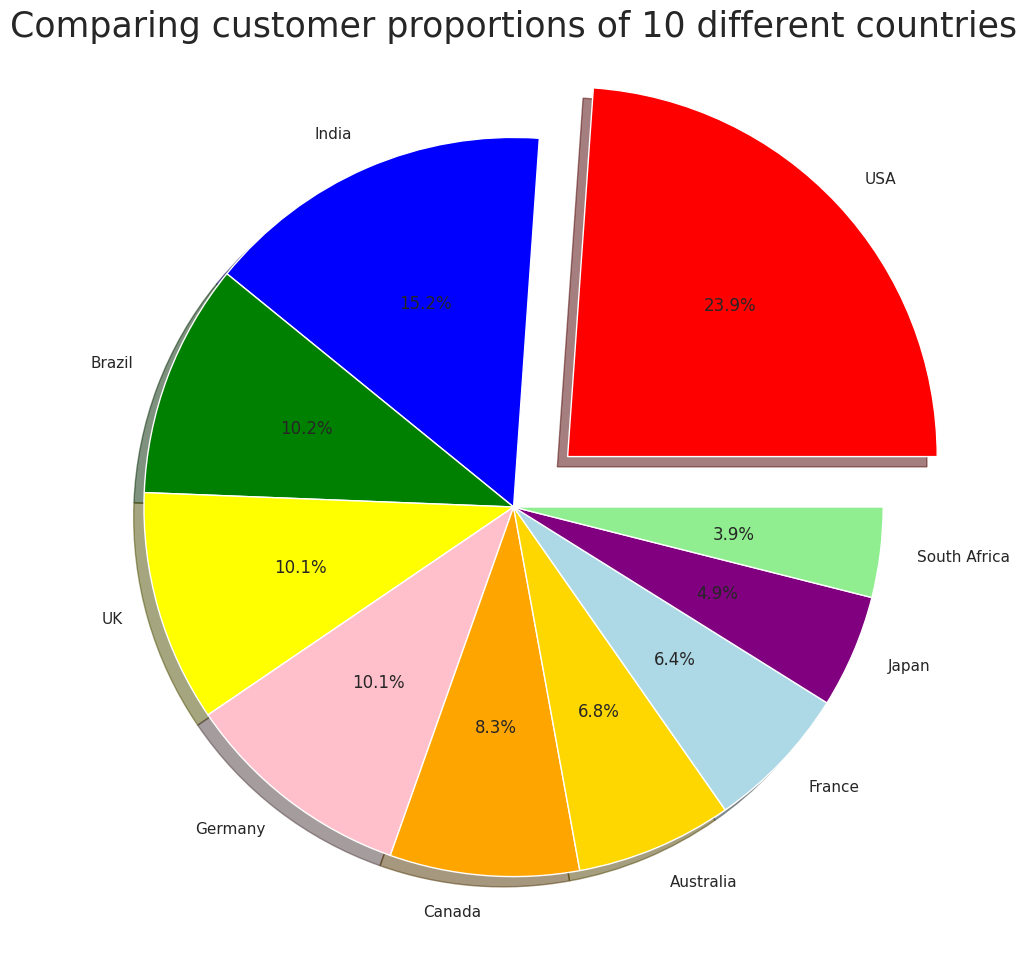

In [56]:
fig = plt.figure(figsize = (15,12))


color_list = ["red","blue","green","yellow","pink","orange",
              "gold","lightblue", "purple", "lightgreen"]


plt.pie(country_values,
        labels = country_names,
        colors = color_list,
        autopct = "%1.1f%%",
        explode = [0.2,0,0,0,0,0,0,0,0,0],
        shadow = True

        )

plt.title("Comparing customer proportions of 10 different countries", fontsize = 25);


Lets select these 5 countries:

* USA
* India
* Brazil
* UK
* Germany

Lets do a ANOVA test on these 5 countries and see if at least one mean value of number of purchases differs.

### Hypothesis Test:

Let us test:

$H_0: \mu_{USA} = \mu_{India} = \mu_{Brazil}= \mu_{UK}= \mu_{Germany}$

$H_a: \text{At least one of the means are different}$

We need to get 5 series of data, the number of purchases for each country.

In [57]:
usa_series = AB_df[AB_df["country"] == "USA"]["num_purchases"]

india_series = AB_df[AB_df["country"] == "India"]["num_purchases"]

brazil_series = AB_df[AB_df["country"] == "Brazil"]["num_purchases"]

uk_series = AB_df[AB_df["country"] == "UK"]["num_purchases"]

germany_series = AB_df[AB_df["country"] == "Germany"]["num_purchases"]


# What do the means look like?

print("Mean of USA purchases:", round(usa_series.mean(),3))
print("Mean of India purchases:", round(india_series.mean(),3))
print("Mean of Brazil purchases:", round(brazil_series.mean(),3))
print("Mean of UK purchases:", round(uk_series.mean(),3))
print("Mean of Germany purchases:", round(germany_series.mean(),3))



Mean of USA purchases: 23.586
Mean of India purchases: 21.023
Mean of Brazil purchases: 20.874
Mean of UK purchases: 23.271
Mean of Germany purchases: 23.515


Brazil and India appear to have the lowest purchases, the other 3 countries have a similar amount of purchases.


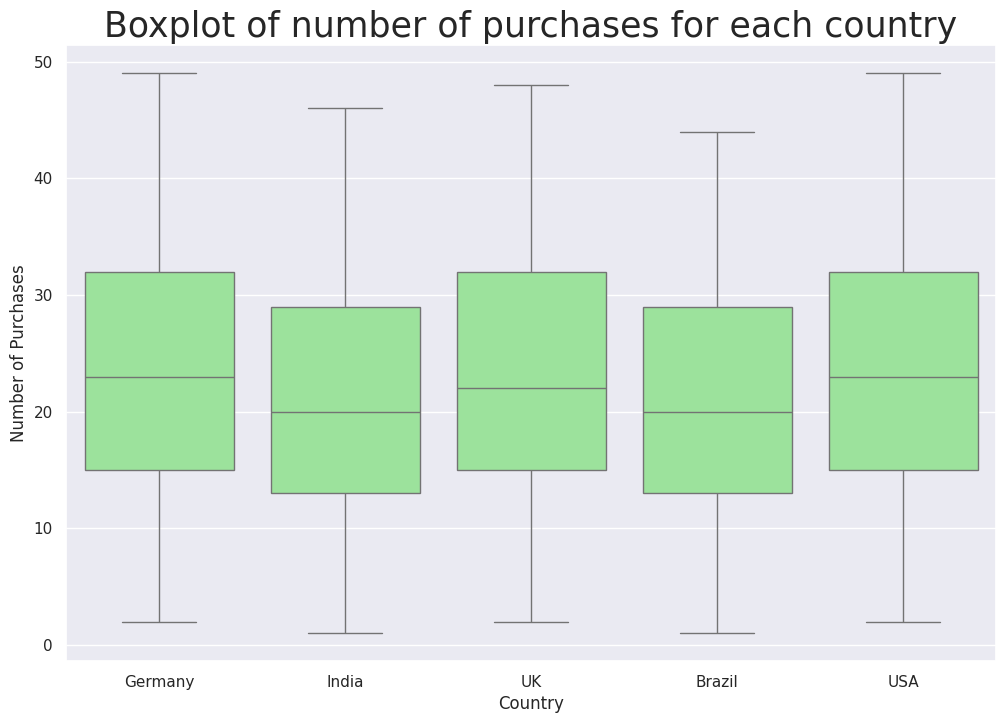

In [58]:
# ALERT: we need to do: .isin([])
# This will NOT WORK: == "USA"|"India"|...
five_df = AB_df[AB_df["country"].isin(["USA","India","Brazil","UK","Germany"])]

fig = plt.figure(figsize = (12,8))

sns.boxplot(five_df, x = "country", y = "num_purchases", color = "lightgreen" )

plt.xlabel("Country")
plt.ylabel("Number of Purchases")

plt.title("Boxplot of number of purchases for each country", fontsize = 25);



We can code ANOVA two ways:

1. SciPy = quick code and quick results.

2. statsmodels = more code but more results

### p-value:

In [59]:
# Scipy way:

from scipy.stats import f_oneway

F_obs, p_value = f_oneway(usa_series, india_series,
                          brazil_series, uk_series, germany_series)

print("F test statistic value:", round(F_obs,3))
print("p-value:", round(p_value,3))

alpha_level_checker(p_value, alpha)


F test statistic value: 25.609
p-value: 0.0
Since p_value < alpha_level, we have enough evidence to reject the null hypothesis!


In [60]:
# statsmodel way:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# make a df with only the 5 countries

# ALERT: we need to do: .isin([])
# This will NOT WORK: == "USA"|"India"|...
five_df = AB_df[AB_df["country"].isin(["USA","India","Brazil","UK","Germany"])]



# fit the model:

model = ols("num_purchases ~ C(country)", data = five_df).fit()

# typ = 2 -> tests each main effect, ignores interaction effects
anova_table = sm.stats.anova_lm(model, typ = 2)

anova_table

,sum_sq,df,F,PR(>F)
C(country),10461.812067,4.0,25.608608,4.270372e-21
Residual,710224.483952,6954.0,NaN,NaN


Since p-value $\approx$ 0 is less than $\alpha = 0.05$, we have enough evidence to reject the null hypothesis!

We have evidence that at least one mean number of purchases of these 5 countries are different.  

Or do we???

We need to check the assumptions of this ANOVA test.

## ANOVA Assumptions

ANOVA has a few assumptions that we need to check.

1. Normality: Are the residuals normal? A QQ plot can help detect this.

2. Equal variance: Are the variances of the residuals of each group roughly similar? A boxplot can check this!

3. Independence: Are the data points independent? AKA does one observation impact another observation?


### Normality Assumption:

Are the residuals normally distributed?

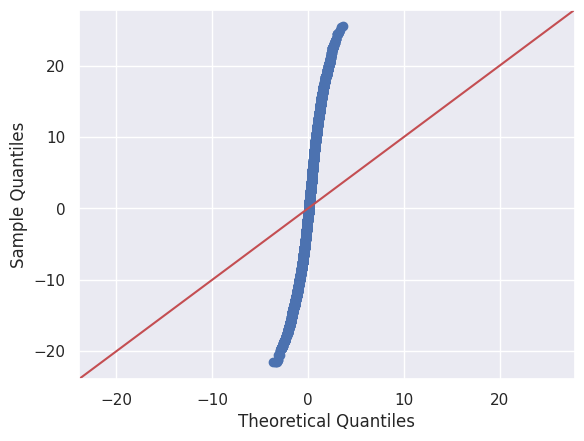

In [61]:
residuals = model.resid
# residuals

# using this code does not work
#fig = plt.figure(figsize = (15,8))

# WARNING: need to assign a variable to only show one qqplot
the_qqplot = sm.qqplot(residuals, line = "45")


Well, it seems like the residuals are NOT normally distributed. The residuals should cluster around the qqline, but they are not.

The Normality assumption seems violated.

But how much observations do we have in total?

In [62]:
n_observations = len(five_df)
print("The five countries have this much observations: ", n_observations)

The five countries have this much observations:  6959


Since ANOVA is robust to non-normality with high a sample size, perhaps we can still use the hypothesis test result. We will need to check the other assumptions though.



###  Equal Variance Assumption:

Lets make a boxplot to see if the variances are equal.




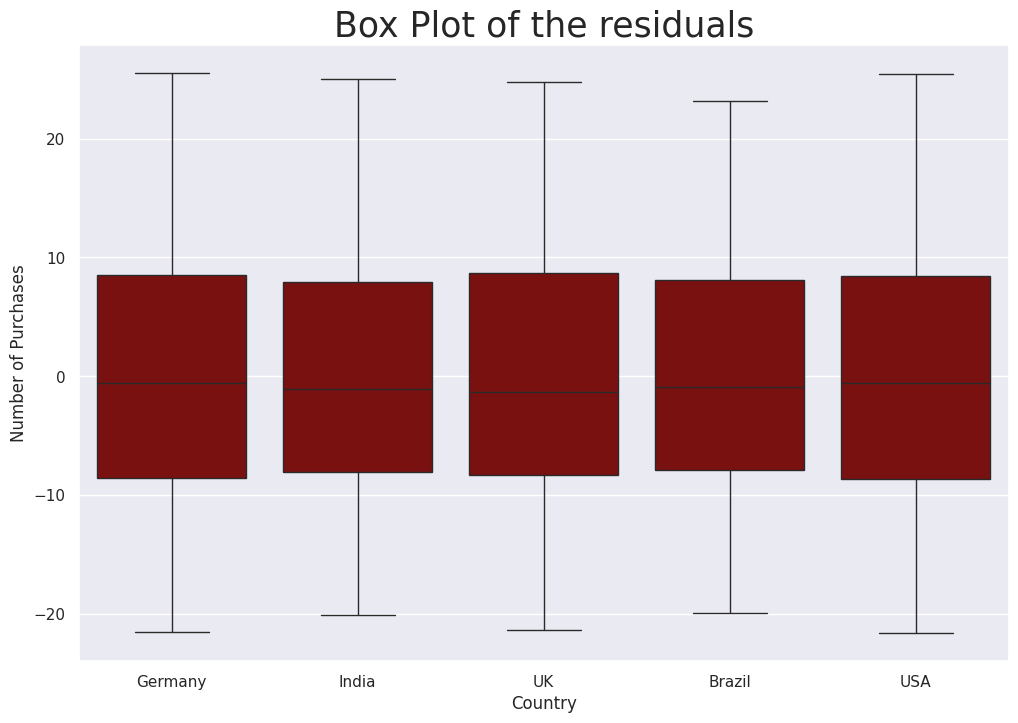

In [63]:
five_df["residuals"] = residuals

fig = plt.figure(figsize = (12,8))

sns.boxplot(five_df, x = "country", y = "residuals", color = "darkred")

plt.xlabel("Country")
plt.ylabel("Number of Purchases")

plt.title("Box Plot of the residuals", fontsize = 25);


It appears that the variance assumption is met! The variances of the residuals seem constant for each country.


###  Independence Assumption:

We will assume that each observation is independent on each other. It makes sense that the first customer should not affect the characteristics of the second customer.

If the first customer is rich while the second customer is middle class, the first customer is bound to buy more purchases, but the second customer is only buying a moderate amount of purchases because he is in middle class, not because he wants to be more humble than the first customer.

### Conclusion:

Even though the normality assumption is violated, we had a high sample size of 6959.
Also, the other assumptions appear to be met, so lets proceed with the hypothesis test results.

Since we rejected the null hypothesis, we  have evidence that at least one mean number of purchases of these 5 countries are different.  

So it appears that USA, India, Brazil, UK, and Germany do not share the same mean number for the number of purchases.

Lets dive into a interesting concept called bootstrapping, a technique that lets us do inference even with a low sample size.

---

# 👢 SECTION H: Statistical Inference on Bootstrapping

What if we do not have much observations? Are we going to give up and call it a day???

NO! We have Bootstrap Bill to save the day! (Remember Bootstrap Bill from Pirates of the Carribean Dead Man's Chest, he was Davy Jone's right hand man!)


In my Pokemon MEGA Project, I gave a great explanation of bootstrapping and I will show it here!







---

## Bootstrapping Intuition:

* Bootstrapping: This is when we have an original sample of data, then randomly pick observations (re-sample) from that original sample with replacement. The new sample is called the bootstrap sample.

We do bootstrapping to mimic real-world data.

* Now this might seem weird, why would I want to re-pick the same data, shouldn't I just get more data? Doesn't bootstrapping feel "weird", why am I allowed to use the same observation multiple times as real observations?

* Well sometimes its expensive or just not possible to get more data, so this is why bootstrapping was made.

* So what about the "weird" part? Well, MANY objects, animals, or people in real life contain the same elements. For example, let's say we have a sample of 50 students.

Student 3 has blue eyes, is 6 feet tall, has yellow hair, and is American. Does that mean that student 3 is realistically the only person in the world who has blue eyes, is 6 feet, has yellow hair, and is American?

NO! Why? Because in the real world,  there are other people in the world who have blue eyes, are 6 feet, have yellow hair, and are American! The fact that things, animals, or people have common traits is why bootstrapping is so powerful! Bootstrapping may select student 3 multiple times, and this is okay to do!


* An example of bootstrapping: Say we have container 1 that contains 4 different candy bars that have different weights: 10g, 20g, 30g, 40g. A machine will replace any candy bar that is taken out of the container, and the candy bar's respective weight will be put in.

The person closes his eyes and picks the candy bars at random.  The goal is to put 10 candy bars in container 2.

Perhaps the person picks a 10g bar, he puts it at container 2, and the machine replaces the transferred 10g bar with another 10g bar. He does the process 9 more times. The process soon goes on and container 2 has 5 10g bars, 4 20g bars, 1 30g bar, and 0 40g bars.

Random re-sampling happened when the person closed his eyes and picked a candy bar from container 1 and moved it to container 2.  Replacement happened when the machine replaced the candy bar. The bootstrap sample is container 2.

Notice that some candy bar weights are picked multiple times due to replacement, and 40g bars are not picked at all since there is a rare chance a certain type of candy bar may not even be picked.

(This explenation originally appeared in my  Pokemon Mega Project.)

---



### What's different from normal data and bootstrapped data?

Now, statistical inference is wayyyyyyy different when using boostrapped data. The interpretation of hypothesis tests, confidence intervals, rejection regions, and p-values is different from regular data.


---


## ❗ WARNING: We do NOT use bootstrapping to "increase the sample size"!

Bootstrapping is NOT used to inflate the sample size or to create fake users!

The point of bootstrapping is to find distrubution properties such:

* bootstrap confidence intervals

* bootstrap hypothesis tests

* variablity of a statistic

Bootstrapping only helps us understand big picture ideas such as the behavior of our estimates. Bootstrapping does NOT give additional evidence.

## Bootstrapping Process

Suppose we have a vector of  data: $\vec x = [x_1, x_2,...,x_k]$

1. Generate a bootstrap sample.

Generate one bootstrap sample by using bootstrapping on $\vec x$.

We will soon end up with the first bootstrap sample: $\vec b_1 = [x_1^*, x_2^*,...,x_n^*]$

We then calculate a statistic such as the mean. We will use take the mean of the bootstrap sample: $\bar b_1 = \frac{1}{n} \sum^n_{i=1} x_i^*$

2. Generate more bootstrap samples

Repeat step 1 for $B$ times. $B$ is the number of bootstrap samples we want.

Each cycle will give us new bootstrap means: $\bar b_2, \bar b_3,..., \bar b_B$

Usually, the minimum value of $B$ is: $B = 1000$

3. We have our bootstrap distribution.

After step 2, we should have a bootstrap distribution.  We also  should have a collection of bootstrap means:

$$\vec b = [\bar b_1, \bar b_2,...,\bar b_B]$$

We can make a histogram to see the bootstrap distribution.


4. Take the overall bootstrap mean.

Lets take one more mean. This can estimate the population mean $\mu$ if the original sample mean $\bar x$ does not have much estimators.

$b_{overall}  = \frac{1}{B} \sum^B_{i=1} \bar b_i$


$\widehat \mu = b_{overall}$ is an estimator for $\mu$.

---



## Bootstrapping Process for a difference in means

Suppose we have two vectors of  data, group A and group B: $\vec x_A = [x_{1A}, x_{2A},...,x_{kA}]$

$\vec x_B = [x_{1B}, x_{2B},...,x_{kB}]$

1. Generate a bootstrap sample.

Generate one bootstrap sample by using bootstrapping on $\vec x_A$ and $\vec x_B$.

We will soon end up with the first bootstrap samples: $ \vec x_A^* = [x_{1A}^*, x_{2A}^*,...,x_{nA}^*]$ and $ \vec x_B^* = [x_{1B}^*, x_{2B}^*,...,x_{nB}^*]$

Usually $n_A$ and  $n_B$ are equal to $k$.


We will use take the mean of the bootstrap samples: $\bar x_A^* = \frac{1}{n_A} \sum^{n_A}_{i=1} x_{iA}^*$

$\bar x_B^* = \frac{1}{n_B} \sum^{n_B}_{i=1} x_{iB}^*$

We then calculate the difference in means statistic. This is our bootstrap statistic:

$$\bar b_1 = \bar x_A^* - \bar x_B^*$$




2. Generate more bootstrap samples

Repeat step 1 for $B$ times. $B$ is the number of bootstrap samples we want.

Each cycle will give us new bootstrap means: $\bar b_2, \bar b_3,..., \bar b_B$

Usually, the minimum value of $B$ is: $B = 1000$

3. We have our bootstrap distribution.

After step 2, we should have a bootstrap distribution.  We also  should have a collection of bootstrap means:

$$\vec b = [\bar b_1, \bar b_2,...,\bar b_B]$$

We can make a histogram to see the bootstrap distribution.


4. Take the overall bootstrap mean.

Lets take one more mean. This can estimate the population mean $\mu$ if the original sample mean $\bar x$ does not have much estimators.

$b_{overall}  = \frac{1}{B} \sum^B_{i=1} \bar b_i$


$\widehat \mu_A - \widehat \mu_B = b_{overall}$ is an estimator for $\mu_A - \mu_B$.

----


### Hypothesis Test for bootstrapped data when we have difference in means

We would usually test:

$$H_0: \mu_A - \mu_B = 0$$

$$H_a: \mu_A - \mu_B \ne 0$$

But we calculating the test statistics and p-values can be a bit tedious with bootstrapped data.

(The same dilemma happens with difference in two proportions.)


### Calculating test statistics and p-values with Bootstrapped data:

When calculating the test statistic and p-values, we would need to center the data.

1. For every original observation:

$x_i^{centered} = x_i - \bar x + \mu_0$

2. Do the bootstrap process.



* So why in the world do we have to center each observation? Well it is because the bootstrapped data is centered on $\bar x$, NOT $\mu_0$.

* So why did we not center each observation for our previous t-tests or AB tests? Well it is because the the test statistic already subtracted the sample mean $\bar x$ by $\mu_0$! Recall that the two sample t-test for unequal variances is:


$$t_{obs} = \frac{\bar x_A - \bar x_B}{\sqrt{\frac{s^2_A}{n_A} + \frac{s^2_B}{n_B} } }$$


---

Can we avoid this centering condition!

YES! We just need to invite back our old friend, the confidence interval. And with bootstrapped data, the confidence interval is looking different!


### Confidence Intervals for Bootstrapped data

Our old friend the Confidence Interval (CI) is more easy going when he is in the bootstrapped mode.

A $(1-\alpha)%$ bootstrapped Confidence Interval is extremely easy to compute. Here it is:

$$(\frac{\alpha}{2} \text{ quantile}, 1- \frac{\alpha}{2} \text{ quantile})$$



**THATS IT!** We just take percentiles and call it a day for bootstrap CIs!

Why can bootstrap CIs be this simple? It is because bootstrap distributions does NOT assume any specific population distribution!


* ALERT: We do NOT need to center the data when making a bootstrap CI. Why?

Because a CI just gives a range of possible parameter values. It does not make p-values, and p-values need centered data!

* Just like regular hypothesis testing, if the $H_0$ value is contained in  the bootstrap CI, we fail to reject the null hypothesis. If the $H_0$ value is outside  the bootstrap CI, then reject the null hypothesis!

---

# 🐫 SECTION I: A/B testing on Bootstrapped data




* NOTE: Bootstrapping can work with proportions!


## APPLICATION: A/B Testing on Two Means (Bootstrapped data on Male and Females annual income):

Recall in Section E that we did a regular A/B test on a difference in means. It was about the annual income of males and females.
If you recall the hypothesis test, we failed to reject the null and concluded we do not have enough evidence to say that males and females have different annual incomes.

What happens if we only had a small amount of data from these males and females? Will bootstrapped data give similar hypothesis test results of failing to reject the null hypothesis?


In [64]:
male_female_df = AB_df.groupby(["gender"]).mean(numeric_only = True)

male_female_df





,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,emotion_scores
gender,,,,,,,,,,,
Female,4972.579704,44.130038,86436.426170,50.911687,22.611910,47.495121,6.346972,15.466680,0.502188,0.105732,0.919587
Male,5027.725459,43.963658,85708.102903,50.936401,22.540984,47.401025,6.334189,15.686747,0.500269,0.112186,0.912897


In [65]:
# first filter the data to get female and male groups:

female_income = AB_df[AB_df["gender"] == "Female"]["annual_income"]
print("Series of female income:", female_income)

print()

male_income = AB_df[AB_df["gender"] == "Male"]["annual_income"]
print("Series of male income:", male_income)


Series of female income: 2       143869
4       110678
9        47550
10      103020
11       91009
         ...  
9993     70344
9994     53410
9995     45002
9997     73884
9998     80849
Name: annual_income, Length: 4937, dtype: int64

Series of male income: 0        85886
1        41041
3        87261
5        90330
6        27302
         ...  
9988     63783
9990     94825
9991    114696
9996     95367
9999     75854
Name: annual_income, Length: 5063, dtype: int64


### Hypothesis Test:

Lets test the annual_income means of:

$$H_0: \mu_{Female} - \mu_{Male} = 0$$

$$H_a: \mu_{Female} - \mu_{Male} \ne 0$$


ALERT: We are not trying to find a test statistic, we are trying to make a bootstrap CI. We will see if


Lets also set our alpha level to be: $\alpha = 0.05$

With this alpha level, we will make a $(1-\alpha)\% \text{ CI} = (1- 0.05)\% \text{ CI} = (0.95)\% \text{ CI}$

---


### Intial small data samples PLUS bootstrapping process

Lets do two parts.

NOTE: We will be using a LOT of the numpy library to do bootstrapping!

**Part 1: Small data samples**

Lets randomly sample 20 observations from the males and females series. This is our small data series.

**Part 2: Bootstrapping process**

Then lets bootstrap those small data series. Lets make about 1000 bootstrap statistics of: $\bar b_1 = \bar x_A^* - \bar x_B^*$


In [66]:
# part 1: small data samples

# seed number is 1:
rng = np.random.default_rng(1)

#rng.choice() is our sampling function!

small_females = rng.choice(female_income, 20)
print("Our random sample of 20 females:", small_females)

print()

small_males = rng.choice(male_income, 20)
print("Our random sample of 20 males:", small_males)


print() # extra space



# part 2: bootstrapping process

# lets make 1000 bootstrap statistics
B = 1000

# make a empty list:
bootstrap_statistic_list = []



# FOR loop -> CONTAINS MOST OF THE BOOTSTRAP PROCESS!

# lets select 1000 bootstrap sample for each bootstrap!

for x in range(1, B + 1):
  boot_females = rng.choice(small_females, 20)
  boot_female_mean = np.mean(boot_females)

  boot_males = rng.choice(small_males, 20)
  boot_male_mean = np.mean(boot_males)

  boot_statistic = boot_female_mean - boot_male_mean

  bootstrap_statistic_list.append(boot_statistic)



print("First 5 observations in the bootstrap distribution is:",
      bootstrap_statistic_list[0:5])

print("Overall Bootstrap Mean value is:",
      round(np.mean(bootstrap_statistic_list),3))


Our random sample of 20 females: [ 83080  83732 113701  66998  81297 162928  84777  82002  45309 138270
  64582 142852  29577  69577  80112  86201 179677 140646 141829  55122]

Our random sample of 20 males: [ 58854  87412  96445  84494  64214 133671 122248 126603  76943  84099
  76292  46726  93169  74720  25320  26453 131507  62802  56681 156015]

First 5 observations in the bootstrap distribution is: [np.float64(20720.59999999999), np.float64(28107.050000000003), np.float64(28661.899999999994), np.float64(27646.300000000003), np.float64(5419.199999999997)]
Overall Bootstrap Mean value is: 12408.392


Lets see a histogram of our bootstrap distribution!

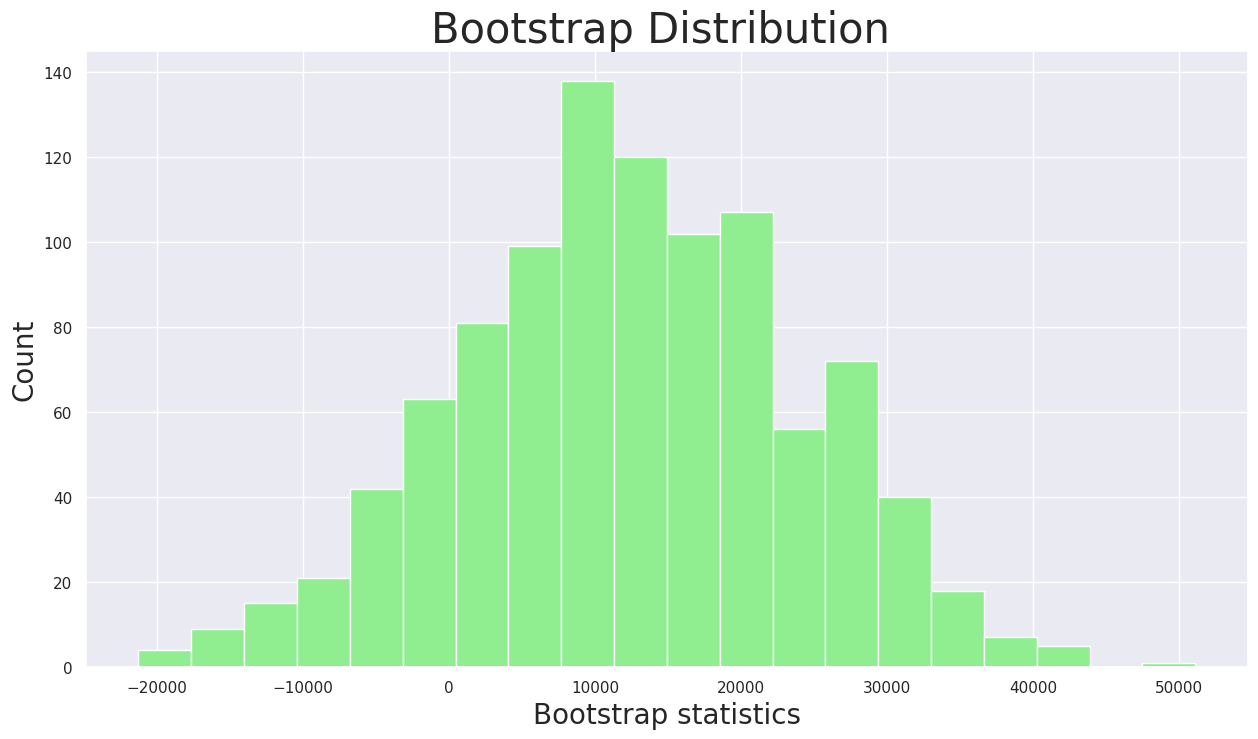

In [67]:
fig = plt.figure(figsize = (15,8))

plt.hist(x = bootstrap_statistic_list, bins = 20, color = "lightgreen")

plt.ylabel("Count", fontsize = 20)

plt.xlabel("Bootstrap statistics", fontsize = 20)

plt.title("Bootstrap Distribution ", fontsize = 30);



### Bootstrap Confidence Interval:

Recall that a $(1-\alpha)%$ bootstrapped Confidence Interval is extremely easy to compute.

$$(\frac{\alpha}{2} \text{ quantile}, 1- \frac{\alpha}{2} \text{ quantile})$$

Lets make a bootstrap CI using NumPy.

In [68]:

# ALERT: BE CAREFUL!!!
# np.perentile(series/list, PERCENT (0% to 100%))

# WARNING: doing np.perentile(series/list, 0.025) gives 0.025%, this is NOT good!
# do: np.percentile(series/list, 2.5), this gives 2.5%!!! This is what we want!
# can also do 0.025 * 100 = 2.5

# bootstrap lower limit:
LL = np.percentile(bootstrap_statistic_list, (alpha/2) * 100)
LL = round(float(LL),3)

# bootstrap upper limit:
UL = np.percentile(bootstrap_statistic_list, (1-alpha/2) * 100)
UL = round(float(UL),3)

# make a tuple for the bootstrap CI
bootstrap_CI = (LL,UL)

print("The bootstrap CI is:", bootstrap_CI)


The bootstrap CI is: (-11031.764, 33794.43)


### Bootstrap distribution AND Bootstrap CI plot

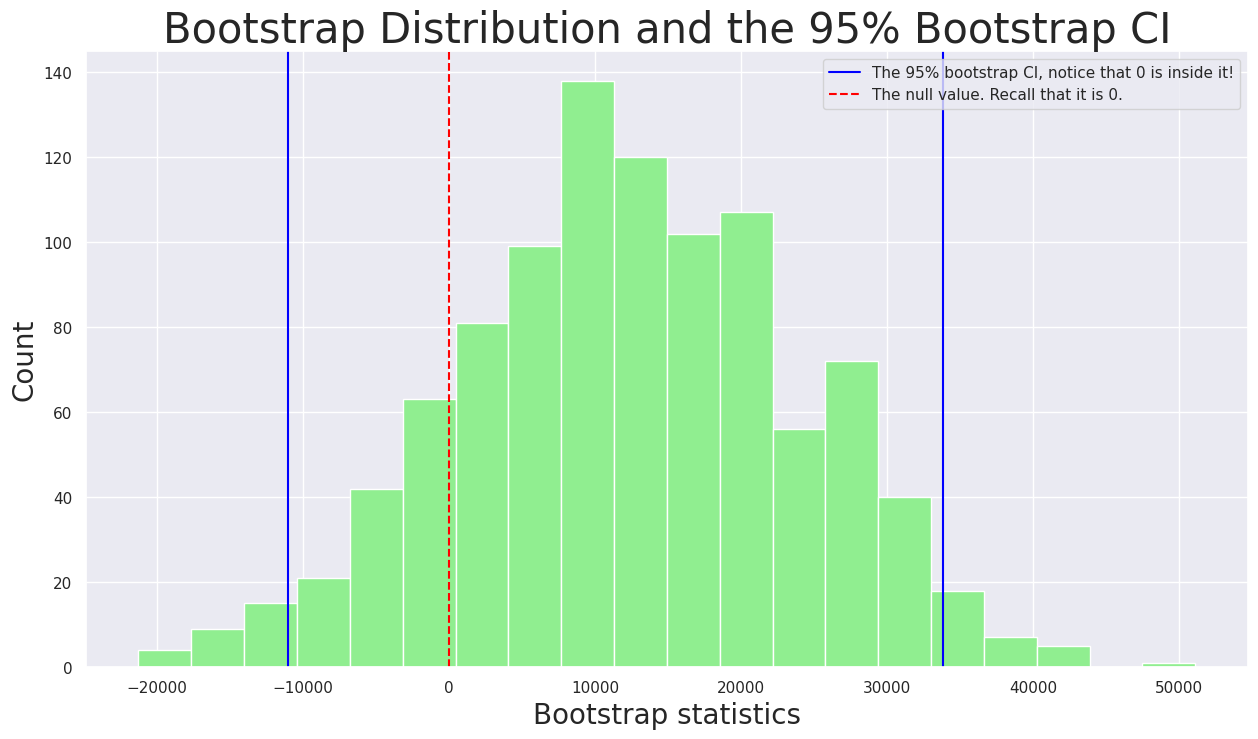

In [69]:
fig = plt.figure(figsize = (15,8))

plt.hist(x = bootstrap_statistic_list, bins = 20, color = "lightgreen")

plt.ylabel("Count", fontsize = 20)

plt.xlabel("Bootstrap statistics", fontsize = 20)

# lines for the 95% bootstrap CI
plt.axvline(x = -11031.764, color = "blue", label = "The 95% bootstrap CI, notice that 0 is inside it!")
plt.axvline(x = 33794.43, color = "blue")

plt.axvline(x = 0, color = "red", linestyle = "--", label = "The null value. Recall that it is 0.")

plt.legend()

plt.title("Bootstrap Distribution and the 95% Bootstrap CI", fontsize = 30);



Notice that the null value of 0 is **contained inside** the bootstrap CI.

Since it is possible that the actual paramter value of $\mu_{female} - \mu_{male}$ is actually 0, we do not have enough evidence to reject the null hypothesis.

We do not have enough evidence to conclude that men and females have different annual incomes, EVEN with bootstrapping!

And to interpret this bootstrap CI: We are 95% confident that this bootstrap CI of  (-11031.764, 33794.43) contains the parameter value.



### Conclusion

So the bootstrap CI contained the null value and because of it, we failed to reject the null hypothesis.

So Section E of regular A/B testing and Section I of bootstrap A/B testing gave similar results. That was interesting since bootstrap used small amounts of data and yet we failed to reject the null hypothesis in both A/B tests!


---

# 💡 SECTION J: Final Conclusion


Here is a table that summarizes all the 6 statistical tests we did:



In [70]:
# Make df display all content in columns:
pd.set_option("display.max_colwidth", None)

summary_table = pd.DataFrame({

 "Statistical Test": ["Single Mean Test on annual income for USA customers:",
                      "Difference in Means A/B Test on annual income for Males and Females:",
                      "Difference in Proportions A/B Test on churned customers for USA and other countries:",
                      "Difference in Means A/B Test on feedback text for young and elder people (Used NLP):",
                      "One Way ANOVA Test on the average number of purchases made for each of the 5 countries:",
                      "Difference in Means A/B Test on annual income for Males and Females (Bootstrap Resampling to revisit Statistical Test 2):",
],


"Results":["Rejected the null that the average income is 67080. BUT due to sampling bias, this conclusion is not reliable.",
           "Failed to reject the null. Concluded that we do not have enough evidence that Males and Females have different average annual incomes.",
           "Failed to reject the null. Concluded that we do not have enough evidence that the churn proportions of the USA and other countries are different.",
           "Rejected the null. Concluded we DO have enough evidence that young and elder people have different average emotional scores.",
           "Rejected the null. Concluded that we DO have enough evidence that at LEAST 1 country has a different average number of purchases compared to other countries.",
           "Failed to reject the null. Even Bootstrapped data had the same conclusion as the original A/B Test on annual income for Males and Females."],

"Evidence":["The p-value is approximately 0. But we can not trust fully this p-value due to possible sampling bias.",
            "The p-value = 0.35. This is greater than alpha = 0.05, so we fail to reject the null.",
            "The p-value = 0.80. This is greater than alpha = 0.05, so we fail to reject the null.",
            "The p-value = 0.043. This is LESS than alpha = 0.05, so we reject the null.",
            "The p-value is approximately 0. This is LESS than alpha = 0.05, so we reject the null.",
            "The bootstrap Confidence Interval contains the null mean value of 0. Therefore, we fail to reject the null."]
})

summary_table.index = range(1, 6 + 1)


summary_table


,Statistical Test,Results,Evidence
1,Single Mean Test on annual income for USA customers:,"Rejected the null that the average income is 67080. BUT due to sampling bias, this conclusion is not reliable.",The p-value is approximately 0. But we can not trust fully this p-value due to possible sampling bias.
2,Difference in Means A/B Test on annual income for Males and Females:,Failed to reject the null. Concluded that we do not have enough evidence that Males and Females have different average annual incomes.,"The p-value = 0.35. This is greater than alpha = 0.05, so we fail to reject the null."
3,Difference in Proportions A/B Test on churned customers for USA and other countries:,Failed to reject the null. Concluded that we do not have enough evidence that the churn proportions of the USA and other countries are different.,"The p-value = 0.80. This is greater than alpha = 0.05, so we fail to reject the null."
4,Difference in Means A/B Test on feedback text for young and elder people (Used NLP):,Rejected the null. Concluded we DO have enough evidence that young and elder people have different average emotional scores.,"The p-value = 0.043. This is LESS than alpha = 0.05, so we reject the null."
5,One Way ANOVA Test on the average number of purchases made for each of the 5 countries:,Rejected the null. Concluded that we DO have enough evidence that at LEAST 1 country has a different average number of purchases compared to other countries.,"The p-value is approximately 0. This is LESS than alpha = 0.05, so we reject the null."
6,Difference in Means A/B Test on annual income for Males and Females (Bootstrap Resampling to revisit Statistical Test 2):,Failed to reject the null. Even Bootstrapped data had the same conclusion as the original A/B Test on annual income for Males and Females.,"The bootstrap Confidence Interval contains the null mean value of 0. Therefore, we fail to reject the null."


In [71]:
# reset the column settings:
pd.reset_option("display.max_colwidth")

We can see that we will not always reject the null hypothesis. In fact, it is actually common to fail to reject the null hypothesis!

We also need to use our judgement. Just because we have a small p-value, it does not always mean it is reliable!!!




### How powerful are statistical inference tests?

So in the tests where we rejected the null hypothesis, can we say that we know what the population means are with certainity?

NO! Single Mean tests, A/B tests, and ANOVA can ONLY tell us that the single group is not that population mean or that multiple groups do not have similar population means or proportions. Thats it!

We made a null hypothesis of $H_0: \mu = 30$, a alternative hypothesis of $H_a: \mu \ne 30$, and a p-value of 0.00132, we can NOT say: "I believe the population mean is 45".

A statistical test is NOT that powerful! It can not give certain population parameter numbers! But it can tell people if there is evidence if a population parameter is likely another number.


### Why do Statistical Tests in the first place?

So if a statistical test can not give us certain parameter numbers, why do many financial companies, health care agencies, sports teams, and anyone do a hypothesis test?

Well hypothesis tests can provide evidence that a certain group is different from another group.

Recall what I said in Section A:

"Lets say that conduct did a A/B test on the weights of NBA centers vs NBA point guards. We find that we have evidence that the weights of centers and point guards are different.

We can use that decision to make basketball strategies where a center who tends to be heavier should prioritize being in the paint, while a point guard should do plays that require fast movement since point guards tend to weigh less.

Statistical tests like t-tests, A/B tests, and ANOVA are powerful tools for data-driven decision making. This project shows some reasons why they are widely used in data science today."


So even if we can not pin point exact parameter values, we can still use results from statistical tests to make a decision!

If you were to do a A/B test, what groups would you want to compare?


# Bibliography

Kacem, Fares Ben. “Customers Transactions.” Kaggle, 31 Oct. 2025, www.kaggle.com/datasets/fares279/customers-transactions/data. Accessed 7 Dec. 2025.

IBM. “What Is Exploratory Data Analysis?” IBM, 17 Nov. 2025, www.ibm.com/think/topics/exploratory-data-analysis#:~:text=data%20analysis%20languages-,What%20is%20EDA?,the%20data%20discovery%20process%20today. Accessed 8 Dec. 2025.

“GDP by Country.” Worldometer, www.worldometers.info/gdp/gdp-by-country/. Accessed 8 Dec. 2025.


“Mean Personal Income in the United States.” FRED, 9 Sept. 2025, fred.stlouisfed.org/series/MAPAINUSA646N. Accessed 8 Dec. 2025.

NLP Explained - AWS, aws.amazon.com/what-is/nlp/. Accessed 10 Dec. 2025.
